In [96]:
# Import libraries

import pandas as pd
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow import keras
from tensorflow import keras
!pip install tensorflow
!pip install keras
import matplotlib.pyplot as plt 
import os 
import seaborn as sns 
%matplotlib inline 


# Load Dataset

# URL to the Covertype dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/covtype/covtype.data.gz"

# Load the dataset from the URL into a DataFrame
df = pd.read_csv(url, header=None, compression='gzip')

# Define column names
column_names = [
    "Elevation", "Aspect", "Slope", "Horizontal_Distance_To_Hydrology", "Vertical_Distance_To_Hydrology",
    "Horizontal_Distance_To_Roadways", "Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm",
    "Horizontal_Distance_To_Fire_Points", "Wilderness_Area_1", "Wilderness_Area_2", "Wilderness_Area_3",
    "Wilderness_Area_4", "Soil_Type_1", "Soil_Type_2", "Soil_Type_3", "Soil_Type_4", "Soil_Type_5",
    "Soil_Type_6", "Soil_Type_7", "Soil_Type_8", "Soil_Type_9", "Soil_Type_10", "Soil_Type_11",
    "Soil_Type_12", "Soil_Type_13", "Soil_Type_14", "Soil_Type_15", "Soil_Type_16", "Soil_Type_17",
    "Soil_Type_18", "Soil_Type_19", "Soil_Type_20", "Soil_Type_21", "Soil_Type_22", "Soil_Type_23",
    "Soil_Type_24", "Soil_Type_25", "Soil_Type_26", "Soil_Type_27", "Soil_Type_28", "Soil_Type_29",
    "Soil_Type_30", "Soil_Type_31", "Soil_Type_32", "Soil_Type_33", "Soil_Type_34", "Soil_Type_35",
    "Soil_Type_36", "Soil_Type_37", "Soil_Type_38", "Soil_Type_39", "Soil_Type_40", "Cover_Type"
]

# Assign column names to the dataset
df.columns = column_names

# Display the first few rows of the dataset
df.head()




Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      51      3                               258   
1       2590      56      2                               212   
2       2804     139      9                               268   
3       2785     155     18                               242   
4       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   
1            220             235            151   
2            234             238            135   
3            238             238            122   
4            220             234            150   

   Horizontal_Distance_To_Fire_Points  ...  Soil_Type_32  Soil_Type_33  \
0                                6279  ...             0             0   
1                                6225  ...             0             0   
2                                6121  ...             0             0   
3                                6211  ...             0             0   
4                                6172  ...             0             0   

   Soil_Type_34  Soil_Type_35  Soil_Type_36  Soil_Type_37  Soil_Type_38  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   Soil_Type_39  Soil_Type_40  Cover_Type  
0             0             0           5  
1             0             0           5  
2             0             0           2  
3             0             0           2  
4             0             0           5  

[5 rows x 55 columns]

2. Exploratory Data Analysis:
   -Summarise main characteristics of data
   -gain a better understanding of the dataset
   -Uncover relationship bwteen different variables
   -Extract important variables for the problem


In [97]:

# 2.1 Descriptive analysis 
df[['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points']].describe().T


count         mean          std  \
Elevation                           581012.0  2959.365301   279.984734   
Aspect                              581012.0   155.656807   111.913721   
Slope                               581012.0    14.103704     7.488242   
Horizontal_Distance_To_Hydrology    581012.0   269.428217   212.549356   
Vertical_Distance_To_Hydrology      581012.0    46.418855    58.295232   
Horizontal_Distance_To_Roadways     581012.0  2350.146611  1559.254870   
Hillshade_9am                       581012.0   212.146049    26.769889   
Hillshade_Noon                      581012.0   223.318716    19.768697   
Hillshade_3pm                       581012.0   142.528263    38.274529   
Horizontal_Distance_To_Fire_Points  581012.0  1980.291226  1324.195210   

                                       min     25%     50%     75%     max  
Elevation                           1859.0  2809.0  2996.0  3163.0  3858.0  
Aspect                                 0.0    58.0   127.0   260.0   360.0  
Slope                                  0.0     9.0    13.0    18.0    66.0  
Horizontal_Distance_To_Hydrology       0.0   108.0   218.0   384.0  1397.0  
Vertical_Distance_To_Hydrology      -173.0     7.0    30.0    69.0   601.0  
Horizontal_Distance_To_Roadways        0.0  1106.0  1997.0  3328.0  7117.0  
Hillshade_9am                          0.0   198.0   218.0   231.0   254.0  
Hillshade_Noon                         0.0   213.0   226.0   237.0   254.0  
Hillshade_3pm                          0.0   119.0   143.0   168.0   254.0  
Horizontal_Distance_To_Fire_Points     0.0  1024.0  1710.0  2550.0  7173.0

Thes statistis provide a summary of the distrabution and central tendencies of the data in each selected column, here we get a better understanding og the dataset and identify potrnital outliers or anomalies.

<Axes: xlabel='Cover_Type', ylabel='count'>

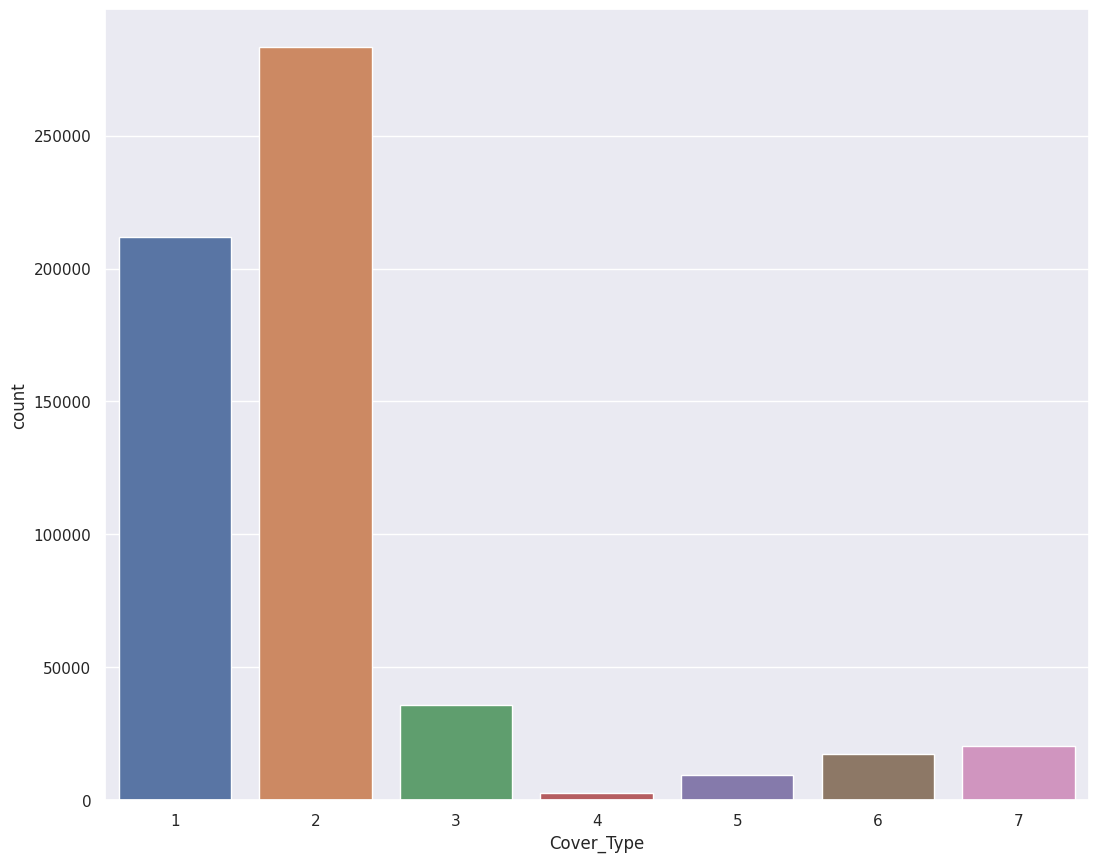

In [98]:


# determining number of samples in each class 

sns.countplot(x='Cover_Type', data=df)



This code creates a count plot to visualise the distribution of samples in each class of the 'Cover_Type' variable.The Classification is unbalanced, to solve this problem- undersampling or oversampling remove smaples which it target class belong [3,4,5,6,7]

In [185]:
# Checking for any missing values
df.isnull().any().any()
# no nan vlaues in our dataset

False

Distrubution of Variables
using hisotgram and box plot
This funtion is useful for quickly vizualizing the distribution and summry statistics of a numerical variable, helping to gain insights into the data's central tendency, dpread, and potential outliers.

2.1 Distribution of variables
-using histogram and boxpolt

In [100]:
# Function to show summary stats and distribution for a column
def show_distribution(var_data, bins=25):

    # Get statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (10,10))

    # Plot the histogram   
    ax[0].hist(var_data, bins=bins)
    ax[0].set_ylabel('Frequency')

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # Plot the boxplot   
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')

    # Add a title to the Figure
    fig.suptitle(var_data.name)

    # Show the figure
    fig.show()

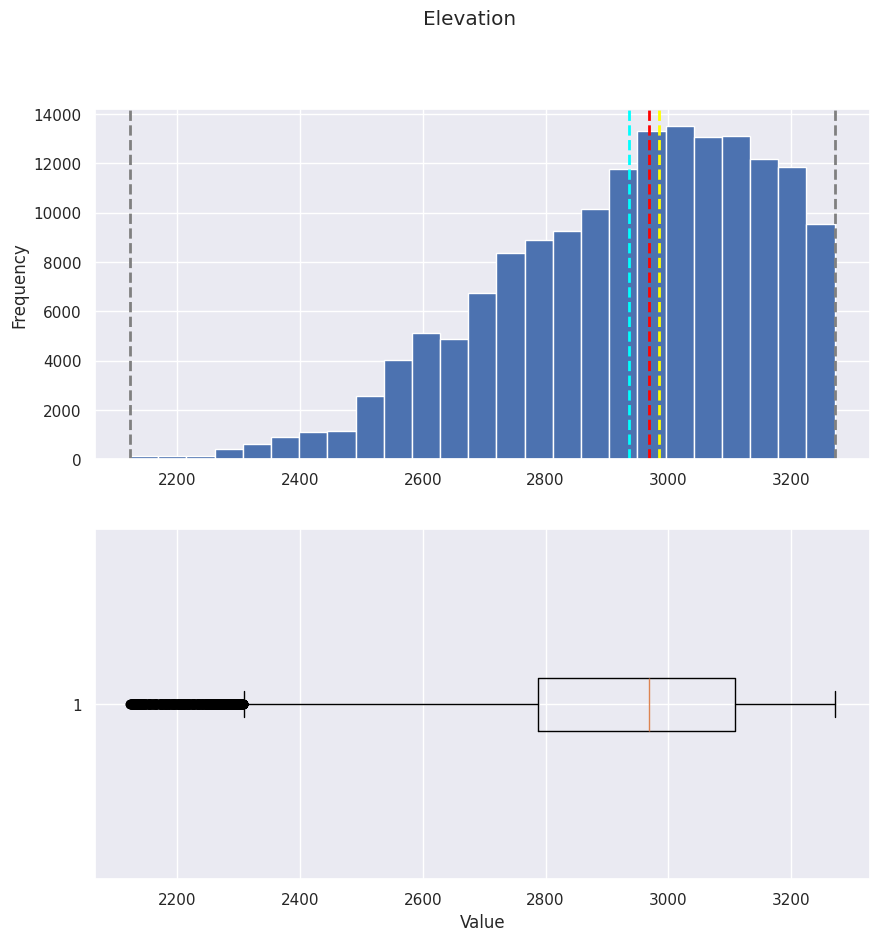

In [186]:
# Visual summarty of the distibution and statistics of the 'Elevation' variable.
show_distribution(df['Elevation'])

In [187]:
#This code creates and displays histograms for a selected set of numerical variables in the datset.
# Each histogram provides a visual representation of the distribution of values for that specific variable.
num_variable = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points']

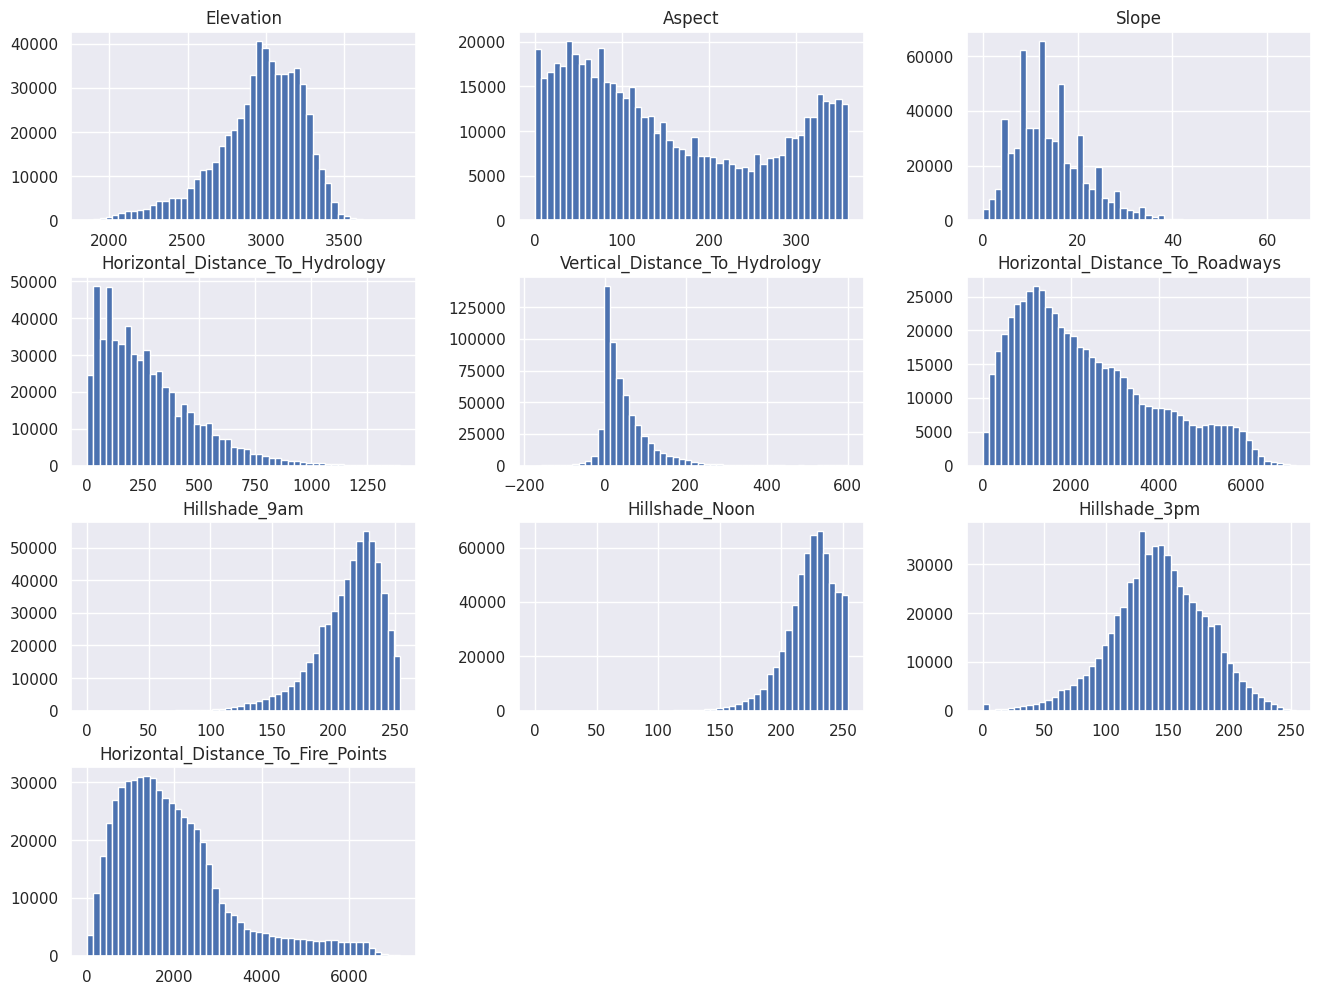

In [103]:
df[num_variable].hist(bins=50, figsize=(16, 12))

plt.show()

Variable Distribution using Kernel Density Estimator
This code creates a distribution plot for the 'Slope' Variable. The plot includes both histogram, ehich displays the frequency distribution of the 'Slope' values, and the KDE line, which provides a smoothed estimate of the probability density of the data. This visulaization helps in understanding the distribution and shape of the data for the 'Slope' variable, including any potential peaks or patterns.

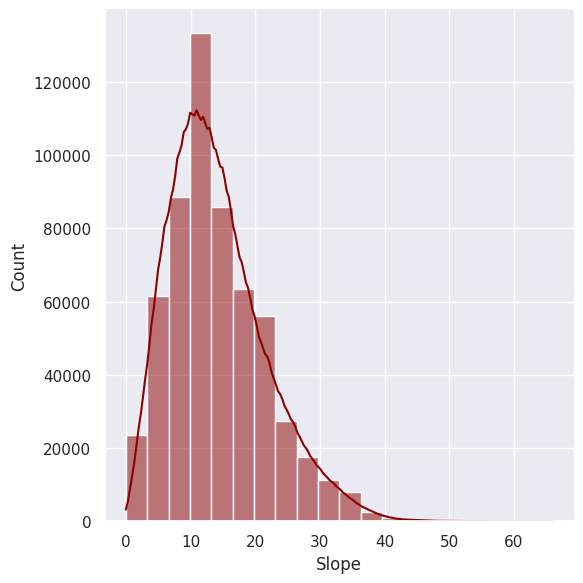

In [104]:
sns.displot(df['Slope'], kde=True,height= 6,color='darkred',bins=20)

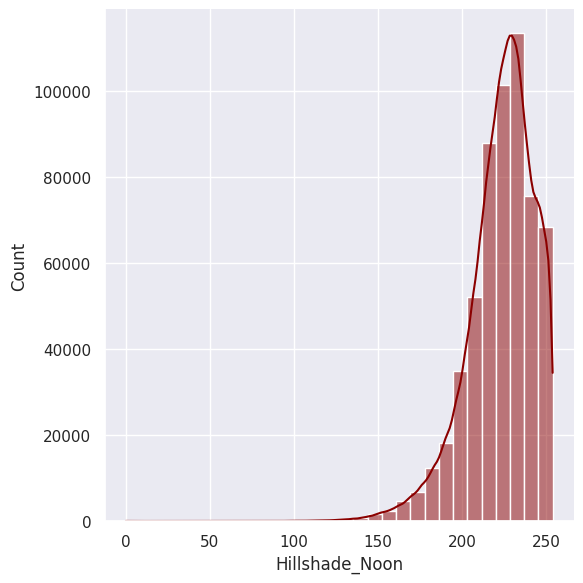

In [105]:
sns.displot(df['Hillshade_Noon'], kde=True,height= 6,color='darkred',bins=30)

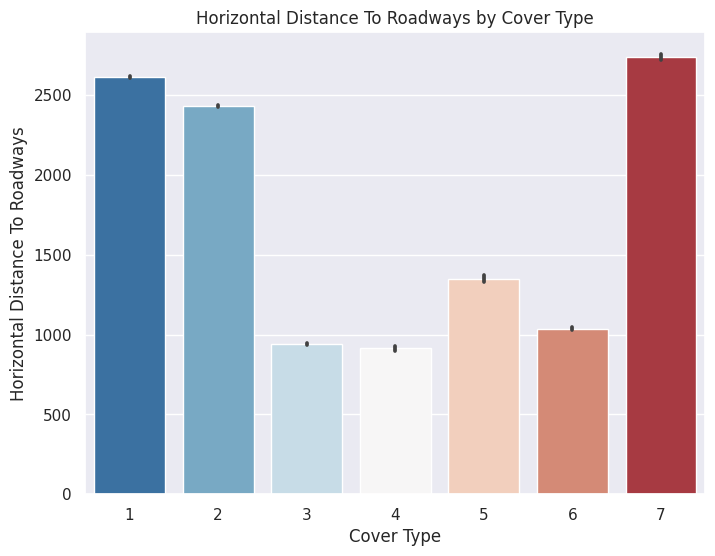

In [106]:

# Create a bar plot using seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x="Cover_Type", y="Horizontal_Distance_To_Roadways", data=df, palette='RdBu_r')
plt.xlabel("Cover Type")
plt.ylabel("Horizontal Distance To Roadways")
plt.title("Horizontal Distance To Roadways by Cover Type")
plt.show()


This visualization helps you understand how the horizontal distance to roadways varies across different cover types. By comparing the heights of the bars, it identifies which cover type tends to have longer or shorter horizontal distances to roadways. 

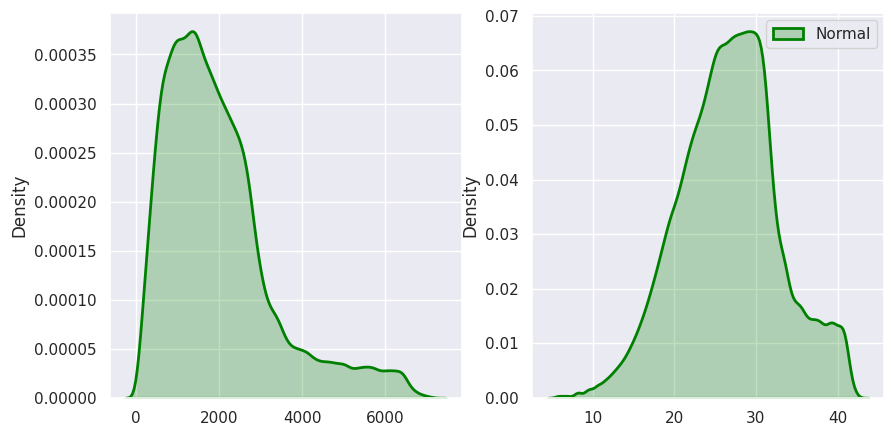

In [107]:
from scipy import stats 
import warnings
warnings.filterwarnings('ignore')

data= df[df['Horizontal_Distance_To_Fire_Points'] > 0]['Horizontal_Distance_To_Fire_Points'].values
# transform training data & save lambda value
fitted_data, fitted_lambda = stats.boxcox(data)
  
# creating axes to draw plots
fig, ax = plt.subplots(1, 2)

# plotting the original data(non-normal) and 
# fitted data (normal)
sns.distplot(data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Non-Normal", color ="green", ax = ax[0])
  
sns.distplot(fitted_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Normal", color ="green", ax = ax[1])
  
  
# adding legends to the subplots
plt.legend(loc = "upper right")
  
# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)

This Data set contains variables with different diistributions, in the provided code the aim is to tranform non-normally distributed dataset into a dataset that follows a more normal distribution. This helps with statistical tests and certain modelling techniques.

In [189]:
# This function takes the df with one-hot encoded columns, reverse-encodes them, and adds a new column containing the decoded values.
# the results are then added as a new column to the df.
def reversed_dummies(df: pd.DataFrame, dummy_cols: list, new_header: str, prefix='_') ->'DataFrame':
    serial=df[dummy_cols].idxmax(axis=1).str.split(prefix).str[-1]
    return pd.concat([df.drop(dummy_cols,axis=1),pd.DataFrame(serial,columns=[new_header])],axis=1)

In [109]:
# List of Soil_Type columns
dummy_cols = ['Soil_Type_1', 'Soil_Type_2', 'Soil_Type_3', 'Soil_Type_4', 'Soil_Type_5',
              'Soil_Type_6', 'Soil_Type_7', 'Soil_Type_8', 'Soil_Type_9', 'Soil_Type_10',
              'Soil_Type_11', 'Soil_Type_12', 'Soil_Type_13', 'Soil_Type_14', 'Soil_Type_15',
              'Soil_Type_16', 'Soil_Type_17', 'Soil_Type_18', 'Soil_Type_19', 'Soil_Type_20',
              'Soil_Type_21', 'Soil_Type_22', 'Soil_Type_23', 'Soil_Type_24', 'Soil_Type_25',
              'Soil_Type_26', 'Soil_Type_27', 'Soil_Type_28', 'Soil_Type_29', 'Soil_Type_30',
              'Soil_Type_31', 'Soil_Type_32', 'Soil_Type_33', 'Soil_Type_34', 'Soil_Type_35',
              'Soil_Type_36', 'Soil_Type_37', 'Soil_Type_38', 'Soil_Type_39', 'Soil_Type_40']

# Apply reversed_dummies function to the DataFrame
df = reversed_dummies(df, dummy_cols, 'Soil')

# List of Wilderness_Area columns
dummy_cols = ['Wilderness_Area_1', 'Wilderness_Area_2', 'Wilderness_Area_3', 'Wilderness_Area_4']

# Apply reversed_dummies function to the DataFrame
df = reversed_dummies(df, dummy_cols, 'Wilderness')

# Display the updated DataFrame
df.head()



Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      51      3                               258   
1       2590      56      2                               212   
2       2804     139      9                               268   
3       2785     155     18                               242   
4       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   
1            220             235            151   
2            234             238            135   
3            238             238            122   
4            220             234            150   

   Horizontal_Distance_To_Fire_Points  Cover_Type Soil Wilderness  
0                                6279           5   29          1  
1                                6225           5   29          1  
2                                6121           2   12          1  
3                                6211           2   30          1  
4                                6172           5   29          1

In [191]:
# The code contains values that include dsubstring "Type", clean he substring from those values to aid further anyaysis.
# data type conversion to 8-bit unsigned integers for memory efficiency.
df['Soil'].replace('Type', '', regex=True, inplace=True)





In [111]:
df['Wilderness'].replace('Area', '', regex=True, inplace=True)
df[['Soil', 'Wilderness']] = df[['Soil', 'Wilderness']].astype(np.uint8)


In [112]:
df[['Soil', 'Wilderness']].dtypes

Soil          uint8
Wilderness    uint8
dtype: object

2.2 Uncover relationship bwtween different variables
- using scatter plot
- using correlation cefficient and p-value

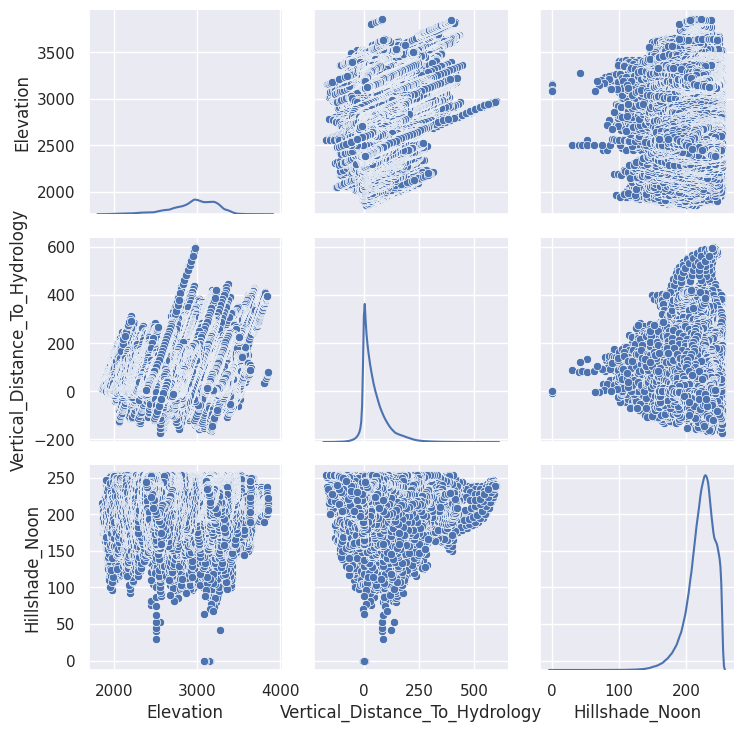

In [113]:
#using scatter plot 

#create pair grid 
grid = sns.PairGrid(df[['Elevation', 'Vertical_Distance_To_Hydrology', 'Hillshade_Noon']])

# specifiy kde plot in main diagonal 
grid.map_diag(sns.kdeplot)

# scatter plot under main diagonol
grid.map_lower(sns.scatterplot)

#scatter plot above main diagonol
grid.map_upper(sns.scatterplot)

plt.show()

This code helps explore and visualize relationships between the selected columns by providing scatter plots for pairs of variables and KDE plots for individual variables' distribution along the main diagnol. Its a useful tool for gaining insights into the data's patterns and correlations.

There is no linear correlation between['Elevstion','sloope',Aspect'] variiables

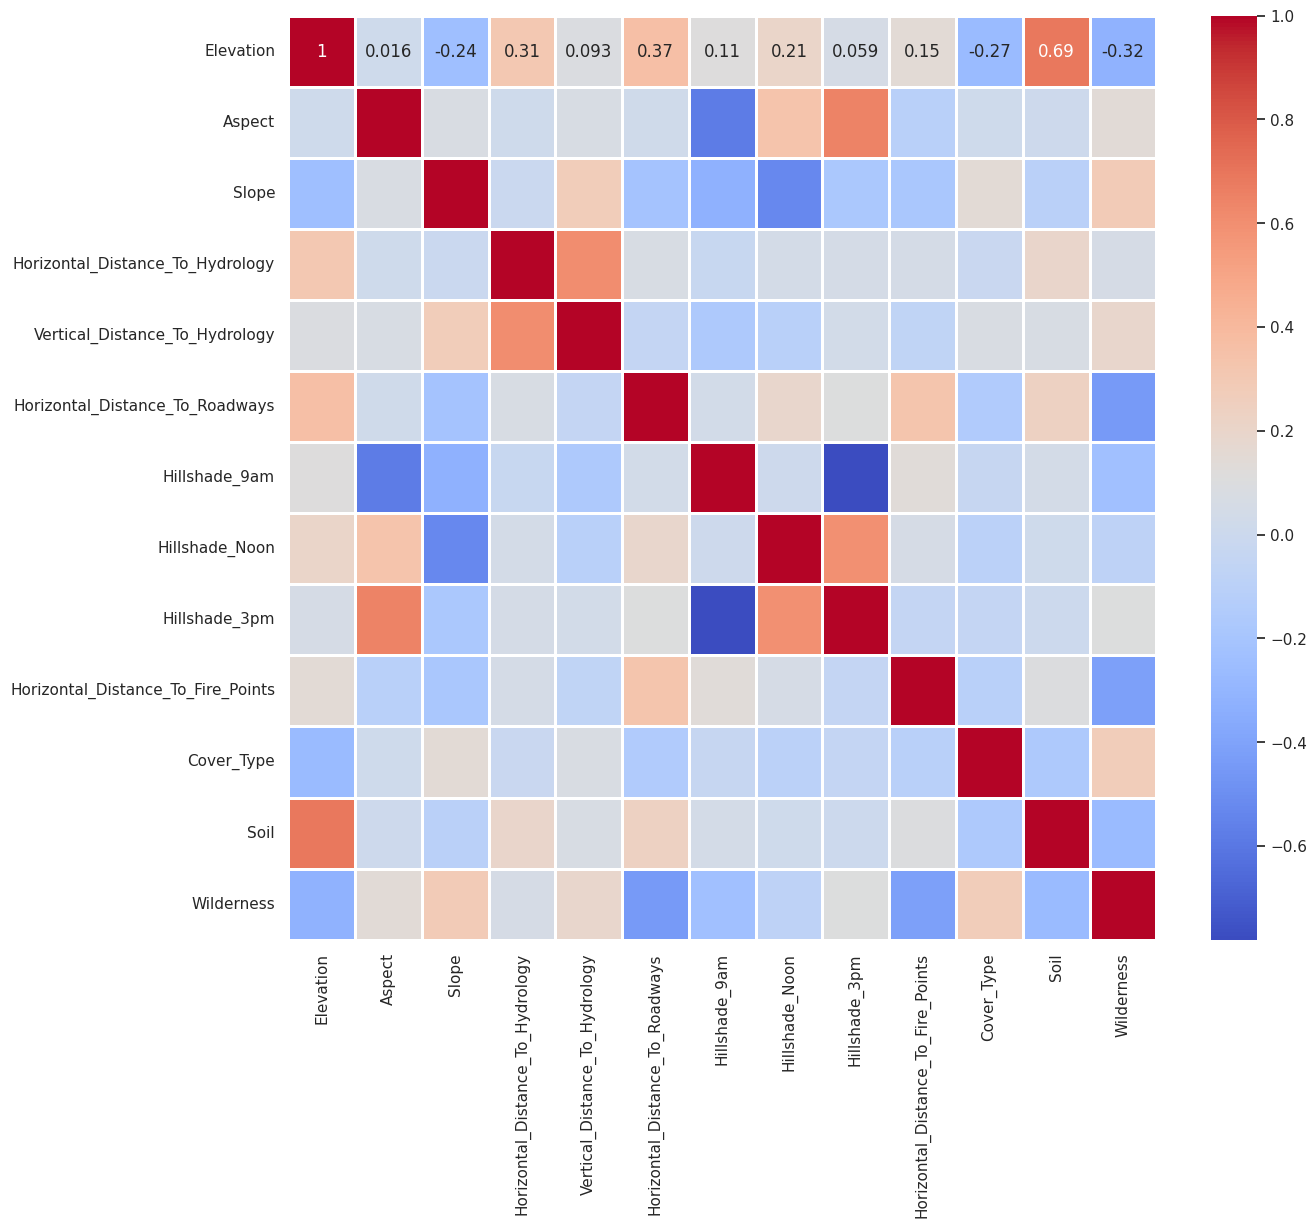

In [114]:

# using corr coeffiecent 
fig, ax = plt.subplots(figsize=(14,12))  
sns.heatmap(df.corr(), linewidths=1, cmap='coolwarm', annot=True, ax=ax)

#plot heaetmap
plt.show()



This shows the strenght and direction of linear realtionships between different pairs of varaibles in the dataset. Positive correlations are represented in warmer colours, while negative correlations in cooler colours. The numbers in each cell of the heamaap provide the actual correlation coefficient values.

<Axes: >

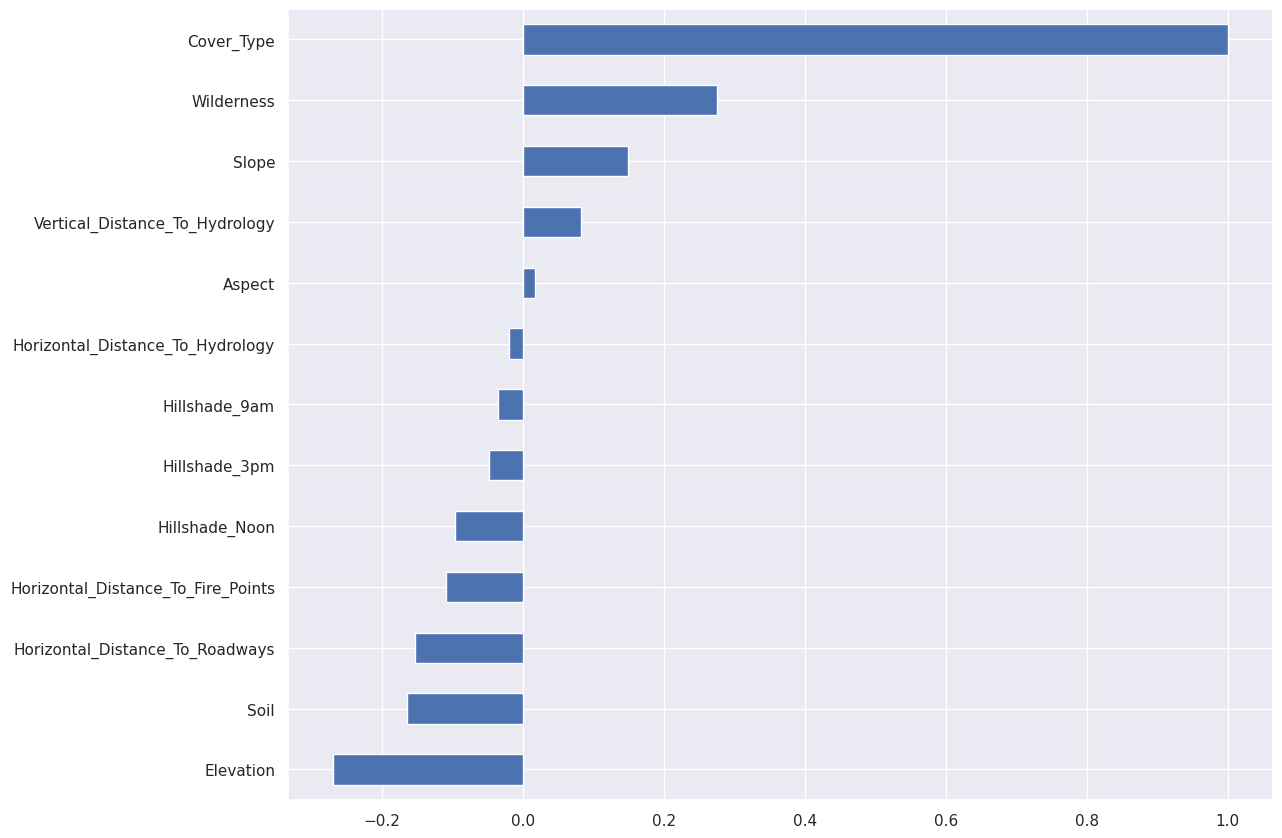

In [115]:
# The bar plot shows the correlation of each variable in the datset with 'Cover_Type', helping you 
df.corr()['Cover_Type'].sort_values().plot.barh()

The resulting horizontal bar plot shows the correlation of each variable in the datset with 'Cover_Type,' helping to understand which variable 'Cover_Type.' This can be useful for feature selection and understanding the relationships between features and target variable. 

In [116]:
# Gives a data frame showing the average 'Cover_Type' value for each unique soil type
df[['Soil', 'Cover_Type']].groupby('Soil')

Linear correlaion Betweeen Features:
- Hillshade_3pm - Aspect
- Vertical_Distance_To_Hydrology- Horizontal_Distance_To_Hydrology
- Hillshade_3pm- Hillshade_9am
- Hillshade_3pm- Hillshade_Noon
- Cover_Type - Elevation
- Cover_Type - Slope
- Soil - CoverType
- Wilderness - CoverType
- Wilderness - Soil

Finding a significant linear correlation between feature can provide insights into how they are related and can be useful for feature selection, data analysis, and modelling purposes.

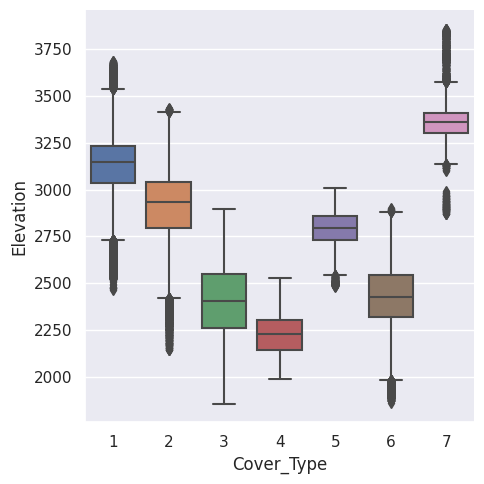

In [117]:
sns.set(rc={'figure.figsize':(12.7,10.27)})

sns.catplot(data=df, x='Cover_Type', y='Elevation', kind='box')

This plot helps understand the distribution and potential variations in elevation across diffrerent cover types in your dataset.The box representing the interquartile range of elevation values, and the horizontal line inside the box show the range of elevation values within a certain limit, and any other data points outside the whiskers are considered outliers and plotted individualy.

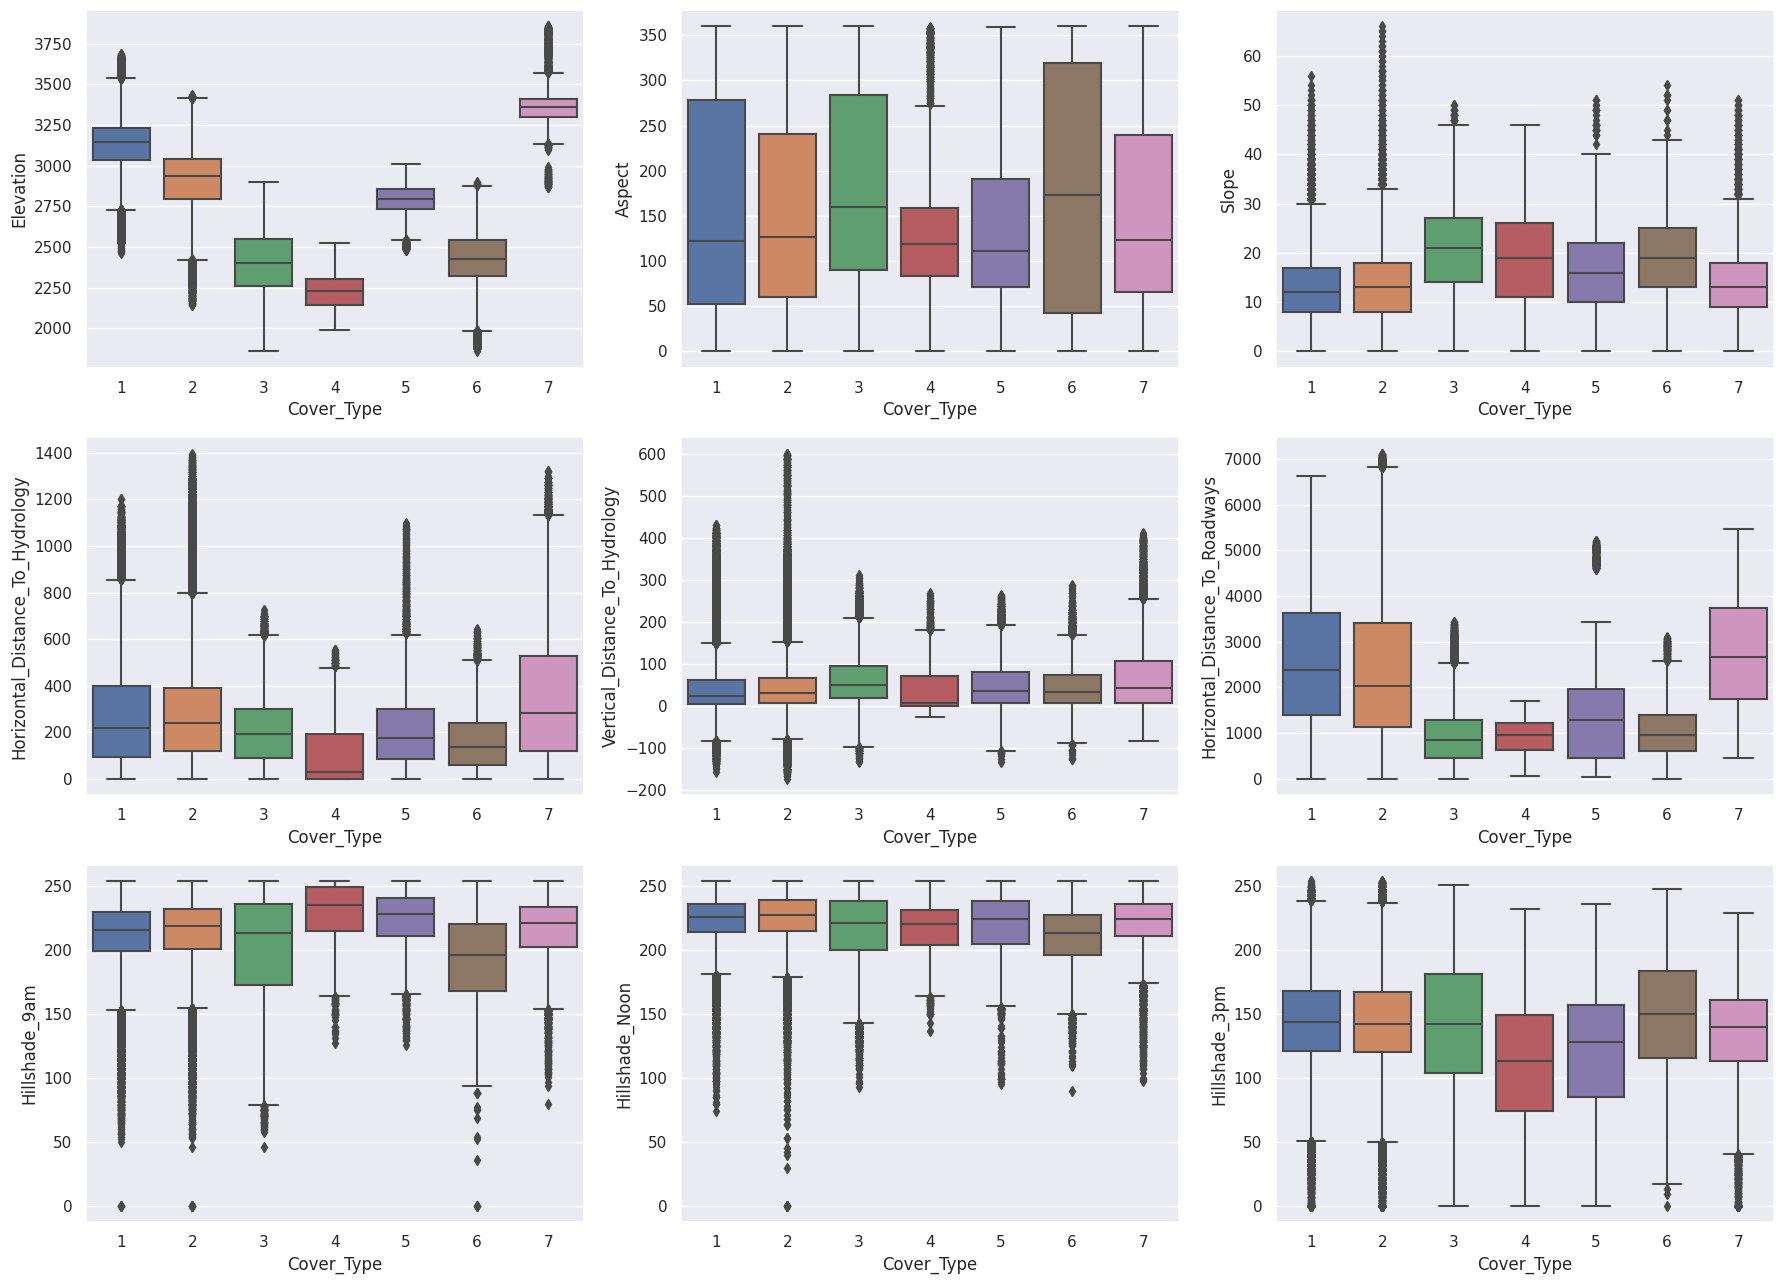

In [118]:
# create figure plot 
fig, ax = plt.subplots(3, 3, figsize=(18, 13))
k = 0
for i in range(3):
  for j in range(3):
    sns.boxplot(data=df, x='Cover_Type', y=num_variable[k], ax= ax[i, j])
    k += 1

plt.tight_layout()
plt.show()


The provided code creates a 3X3 grid box ploats to visualise the distribution of various numerical variabls for each cover ype in the dataset.

Soil_Wilderness

In [192]:
# The code performs a grouped descriptive analysis of the 'Soil' variables based on the 'Wilderness' varaible
df.groupby('Wilderness')['Soil'].describe().T



Wilderness             1            2             3           4
count       82742.000000  5780.000000  70492.000000  3997.00000
mean           24.498139    24.527682     23.734395     6.70653
std             6.818248     4.614102      9.589316     3.28915
min             8.000000    13.000000      2.000000     1.00000
25%            22.000000    23.000000     16.000000     5.00000
50%            29.000000    23.000000     24.000000     6.00000
75%            29.000000    24.000000     32.000000    10.00000
max            40.000000    40.000000     40.000000    17.00000

Each row corresponds to a different wilderness category and each column provides summary statistics for the 'Soil' varaible within that category.For example, it can be observed that the mean,standard deviation, and quartiles differ across the Wilderness categories, providing  insights into the variability of soil Types within each Wilerness area.

H_Distance_To_Hydrology - V_Distance_To_Hydrology

<Axes: xlabel='Vertical_Distance_To_Hydrology', ylabel='Horizontal_Distance_To_Hydrology'>

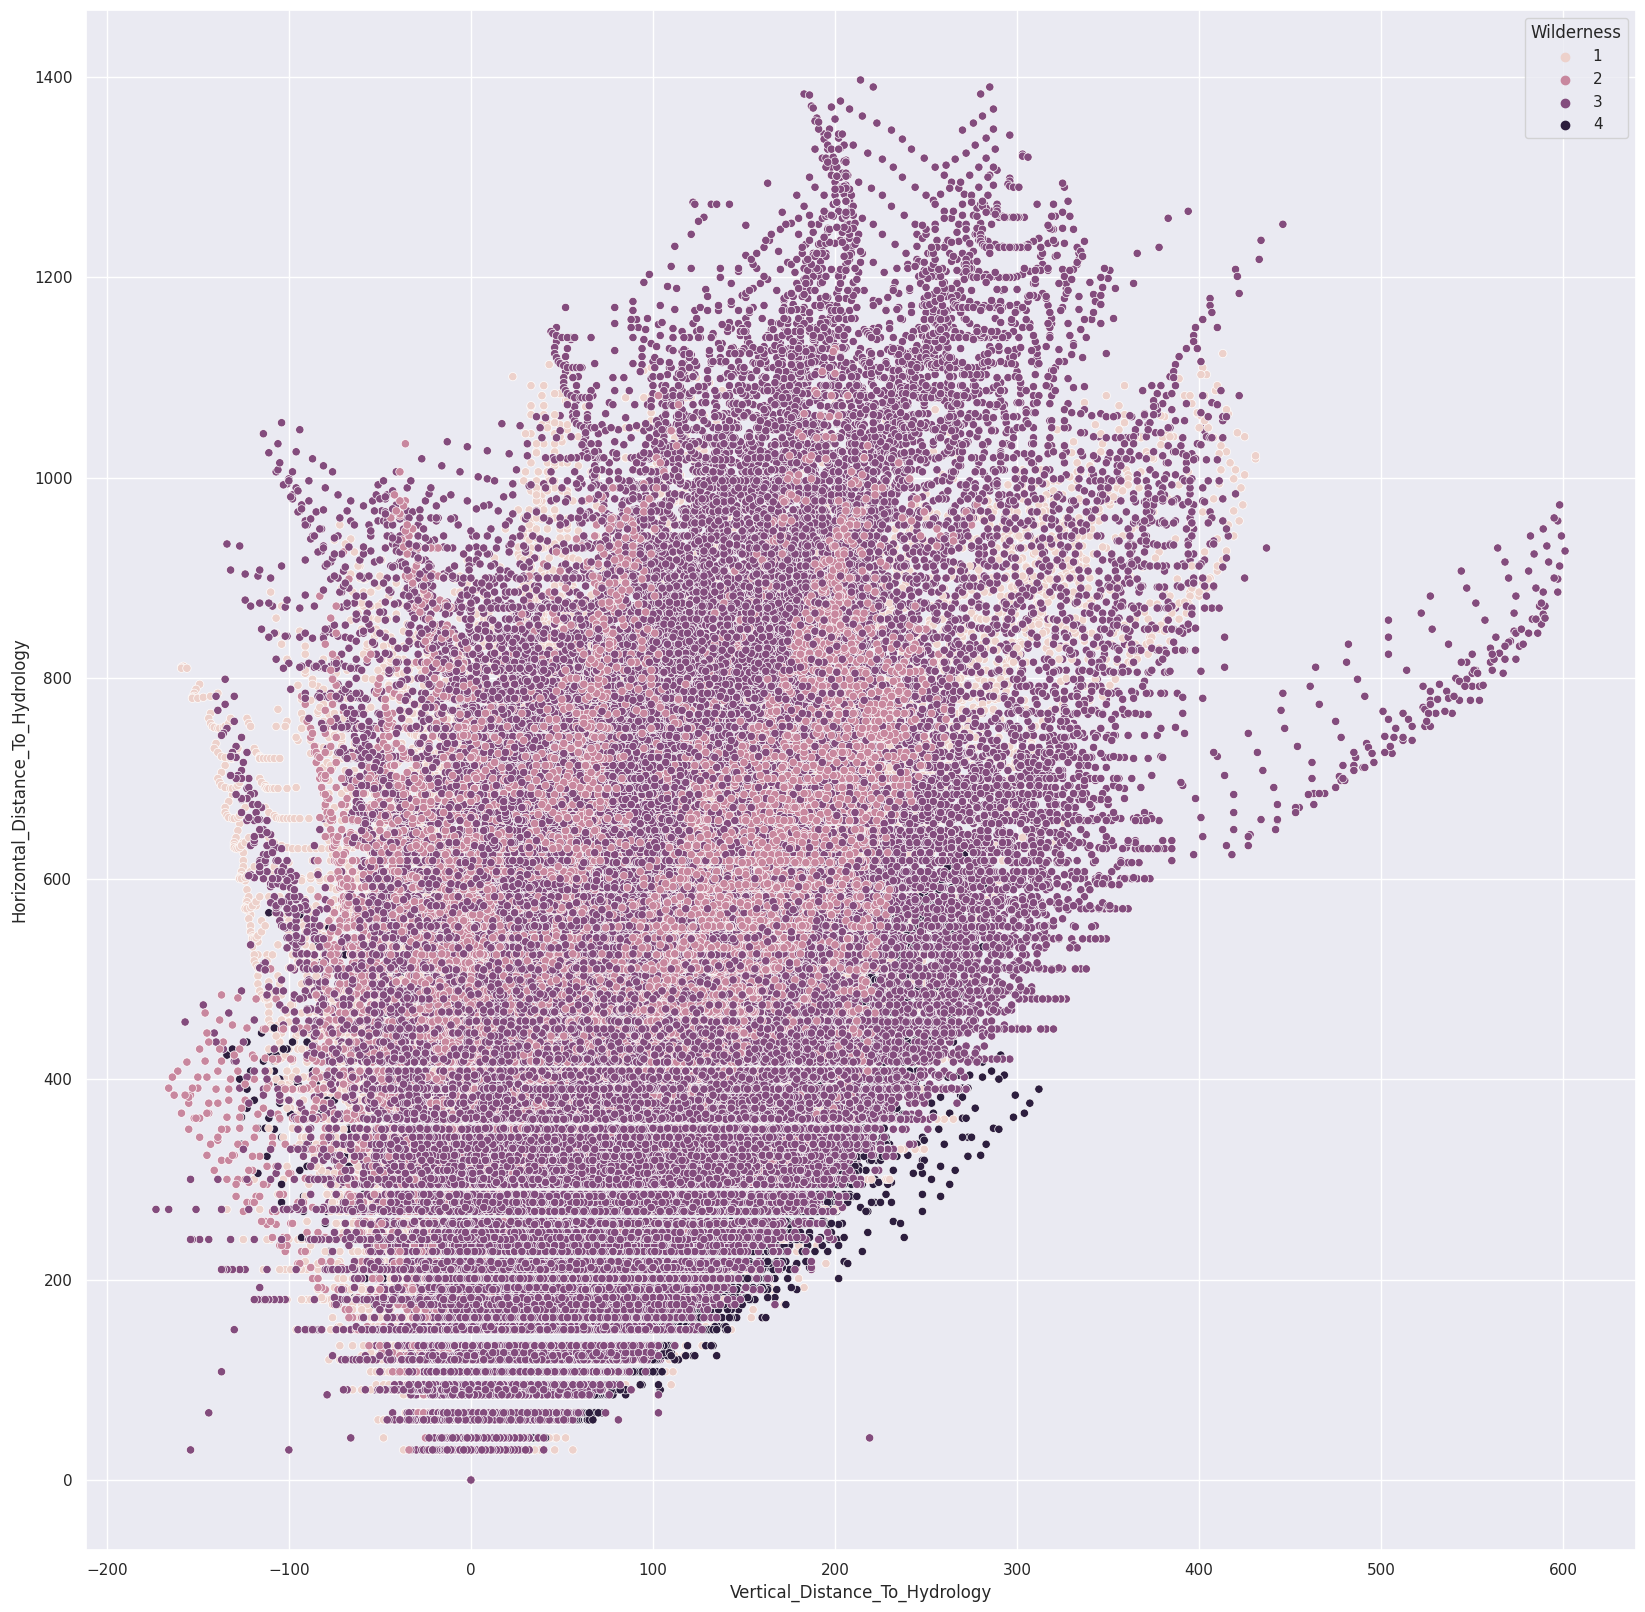

In [120]:
plt.figure(figsize=(20, 20))
sns.scatterplot(x='Vertical_Distance_To_Hydrology', y='Horizontal_Distance_To_Hydrology', data=df, hue='Wilderness')

Data Cleaning
- remove outliers and then show distribution again
- remove null values and errors if exit

In [121]:
def remove_outliers(col, low_percentile=0.01, high_percentile=0.90):
    low_percentile = df[col].quantile(low_percentile)
    high_percentile = df[col].quantile(high_percentile)
    return df[(df[col]<high_percentile) & (df[col]>low_percentile)]

In [122]:
print('dataframe shape befor remove outlires {}'.format(df.shape))

for col in num_variable:
    df = remove_outliers(col)
    print('dataframe shape after remove outlires in col {}{}'.format(col, df.shape))


dataframe shape befor remove outlires (581012, 13)
dataframe shape after remove outlires in col Elevation(516609, 13)
dataframe shape after remove outlires in col Aspect(457695, 13)
dataframe shape after remove outlires in col Slope(395552, 13)
dataframe shape after remove outlires in col Horizontal_Distance_To_Hydrology(337094, 13)
dataframe shape after remove outlires in col Vertical_Distance_To_Hydrology(299513, 13)
dataframe shape after remove outlires in col Horizontal_Distance_To_Roadways(266301, 13)
dataframe shape after remove outlires in col Hillshade_9am(234687, 13)
dataframe shape after remove outlires in col Hillshade_Noon(206839, 13)
dataframe shape after remove outlires in col Hillshade_3pm(183250, 13)
dataframe shape after remove outlires in col Horizontal_Distance_To_Fire_Points(163011, 13)


In [ ]:

#the code loops through the first three numerical variables.
for col in num_variable[:3]:
  show_distribution(df[col], bins=15)


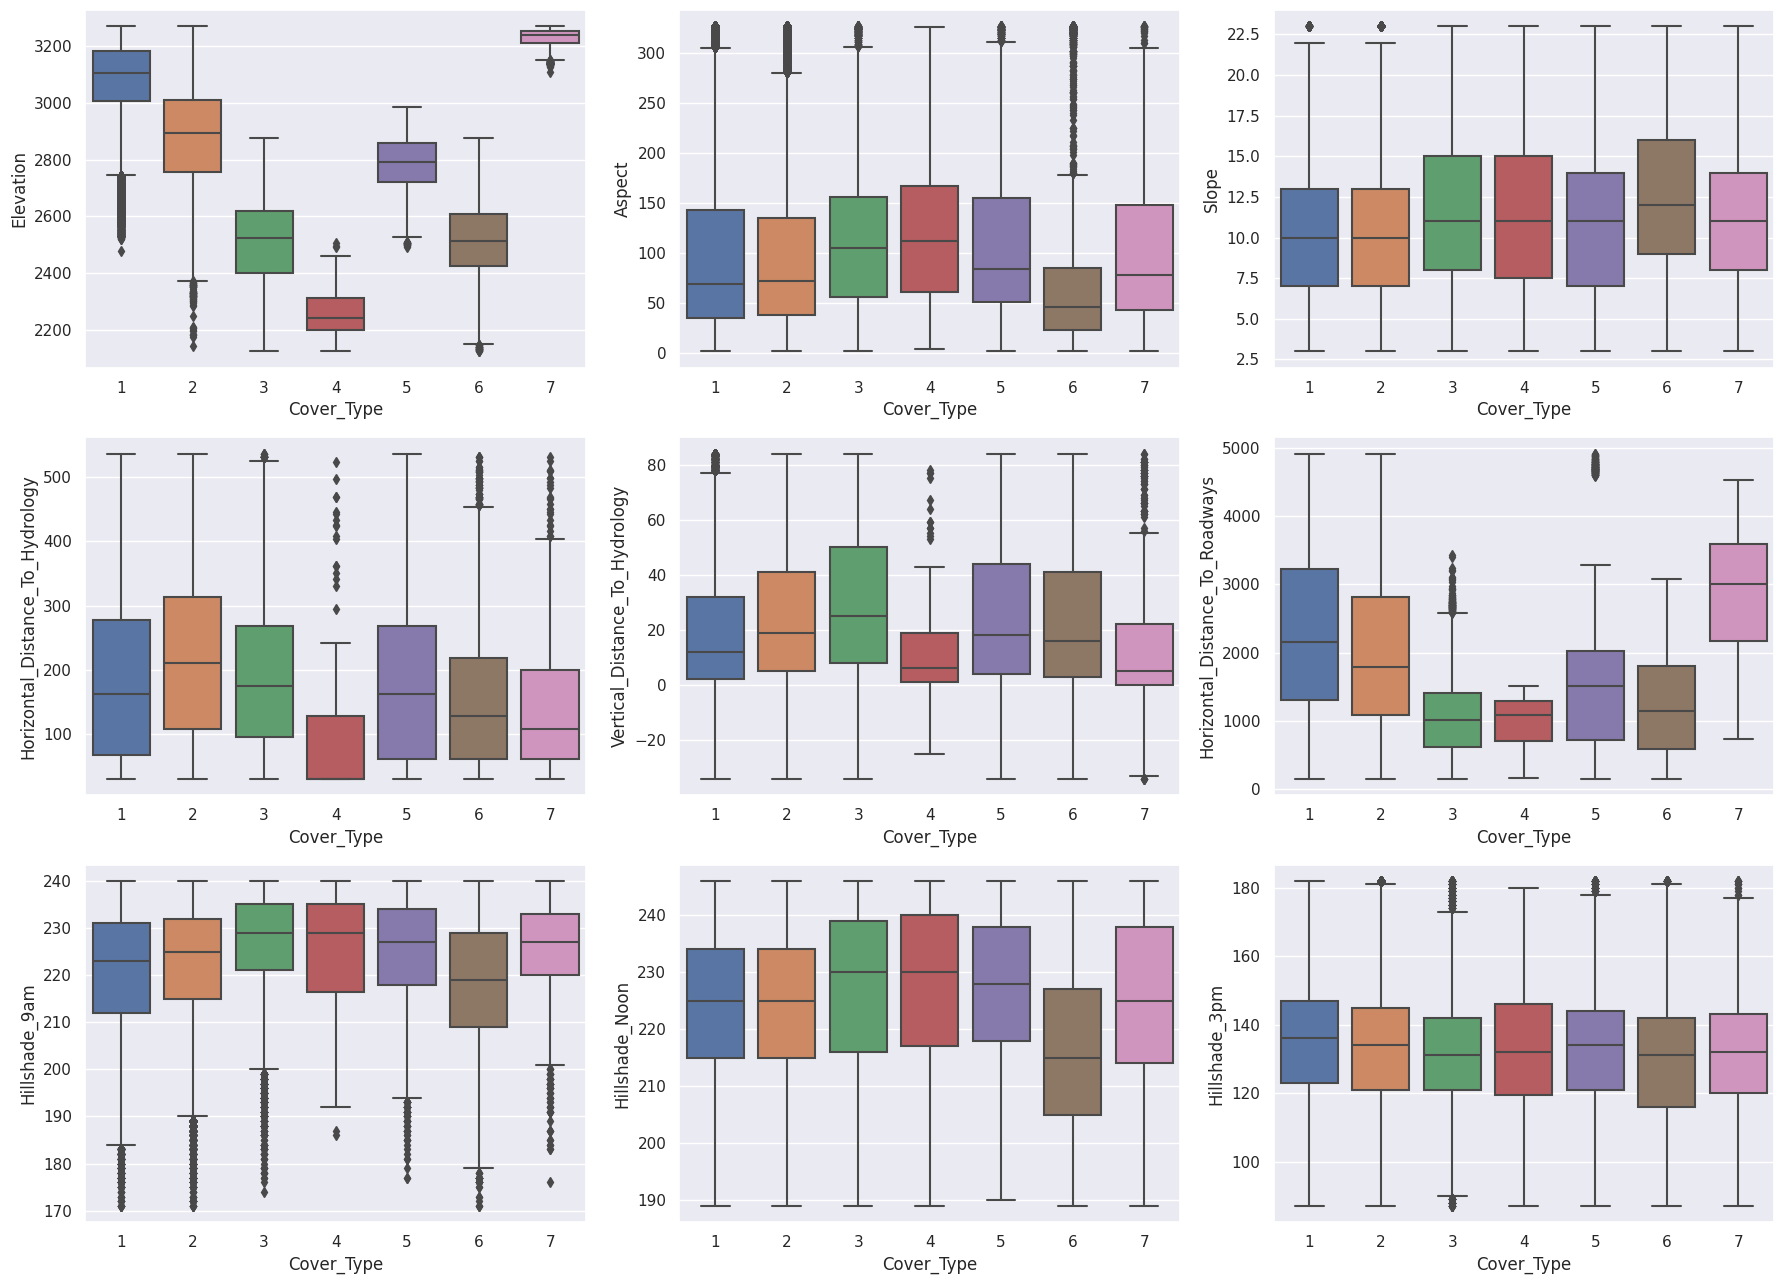

In [124]:
# create figure plot 
fig, ax = plt.subplots(3, 3, figsize=(18, 13))
k = 0
for i in range(3):
  for j in range(3):
    sns.boxplot(data=df, x='Cover_Type', y=num_variable[k], ax= ax[i, j])
    k += 1

plt.tight_layout()
plt.show()

The code is used to create a visual representation of how the distribution of each numerical variable varies across different cover types. Each subplot represents on numerical varaible, and the boxplots show summary tatistics and potential outliers for each cover type.

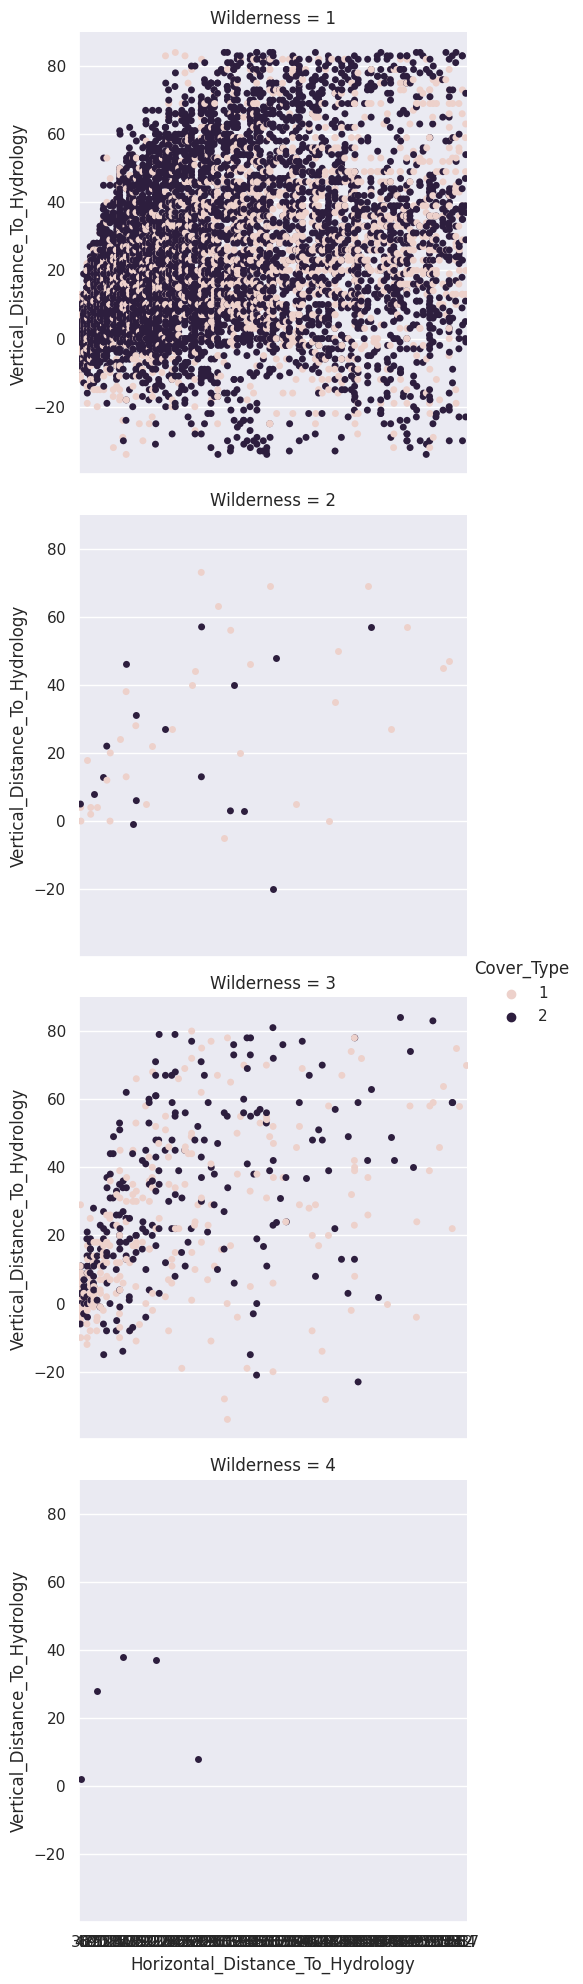

In [125]:
#generate categorical plots
g = sns.catplot(x="Horizontal_Distance_To_Hydrology", y="Vertical_Distance_To_Hydrology",
                hue="Cover_Type", row="Wilderness",
                data=df[df['Cover_Type'].isin([1, 2])].iloc[:10000],
                )
# Display the plot
plt.show()


The purpose of this code is to visualise the relationship between "horizontal_Distance_To_Hydrology" and"Vertical_Distance_To_Hydrology" for cover types 1 and 2, while also condidering the "Wilderness" category. The Plots are organised into rows based on the different wilderness areas, and each subplot within a row represents a specific combination of cover type and wilderness area, This visualisation helps explore how these variables are distributed within different categories.


Modeling (Mulit-Class Classification)

Train and evaluate each of these models on your dataset to see which one performs best.Evaluate the performance using metrics like accuracy, percision recall, F1-score, and confusion matrices.

    LogisticRegression: LR is a linear classification algorithm used for binary and multi-class classification. It models the probability that a given input belongs to a pariticular class.
    
    Support Vector Machine: finds a hyperplane that best seperates different classes in a high- dimensionsl space. It can handle both binaru and multi-class classification tasks.
    
    Random Forest Tree: Ensemble learning methos that combines multiple decision trees to make predictions. Often used foe clasification tasks and can handle multi-class problems.
    
    XGBoosting: XGBoost is a popular gradient boosting algorithm known for its high predictive accuracy. It can be used for both regression and classification tasks, including multi-class classification.
    
    DecesionTree: A decission tree is a simple yet interpretable machine learning algorithm used for classification and regression. It breaks down a dataset into smaller subsets based on different features.
    
    KNeighrestNeighbor: KNN is a lazy-learning algorithm used for classification and regression. It classifies data points by finding the majority class among their K-nearest neighbours.



In [126]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import classification_report


def train_and_test(classifier, X_train, X_test, y_train, y_test):
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    y_score = classifier.predict_proba(X_test)[:,1]
    
    
    train_accuracy = classifier.score(X_train, y_train)
    accuracy = classifier.score(X_test, y_test)
    classification_rep = classification_report(y_test, y_pred)
    con_matrix = confusion_matrix(y_test, y_pred)
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    

    # ploting confustion matrix
    plt.figure(figsize=(12,12))
    plt.subplot(2,1,1)
    sns.heatmap(con_matrix, annot=True, fmt="d", xticklabels=target_names, yticklabels=target_names)
    plt.ylabel("Real value")
    plt.xlabel("Predicted value")
    plt.show()

    # print scores
    print ("accuracy  score on train : {}".format(train_accuracy))
    print ("accuracy  score on test : {}".format(accuracy))
    print ("auc  score: {} ".format(roc_auc))
    print(classification_rep)

    # print ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()



In [127]:
from sklearn.svm import SVC
from sklearn.feature_selection import SelectFromModel, RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier


In [128]:
binary_data = df[df['Cover_Type'].isin([1, 2])]
print(df.shape)
print(binary_data.shape)


(163011, 13)
(149825, 13)


In [129]:


binary_data.head()



Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
139       2490      79      9                               240   
149       2536      34      5                               242   
150       3168      95      6                                30   
158       2555      58     14                               285   
159       2499      42     13                               497   

     Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
139                              13                              878   
149                              16                             1242   
150                               0                             4884   
158                              19                             1231   
159                              -7                              953   

     Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
139            232             224            124   
149            219             228            146   
150            229             231            136   
158            230             209            109   
159            222             212            123   

     Horizontal_Distance_To_Fire_Points  Cover_Type  Soil  Wilderness  
139                                4184           2    18           1  
149                                4201           2    18           1  
150                                1239           1    29           1  
158                                4159           2    18           1  
159                                3950           2    18           1

In [144]:
soil_type_columns = ['Soil']

# Select relevant columns including soil types
features = binary_data[['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
                        'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
                        'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
                        'Horizontal_Distance_To_Fire_Points'] + soil_type_columns]



# Target variable
target = binary_data['Cover_Type']

# Split the data into training and testing sets
X = features.values
y = target.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)





Define Pipline to prepreocess data

Standard Scaler-standardizes the features by removing the meand and scaling them to have variance. Column tranformer ensures that tnumeric features are appropriately scaled before training machine learning models.



In [145]:
# Define preprocessing for numeric columns (scale them)
numeric_features = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])




preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
        ])


LogisticRegression

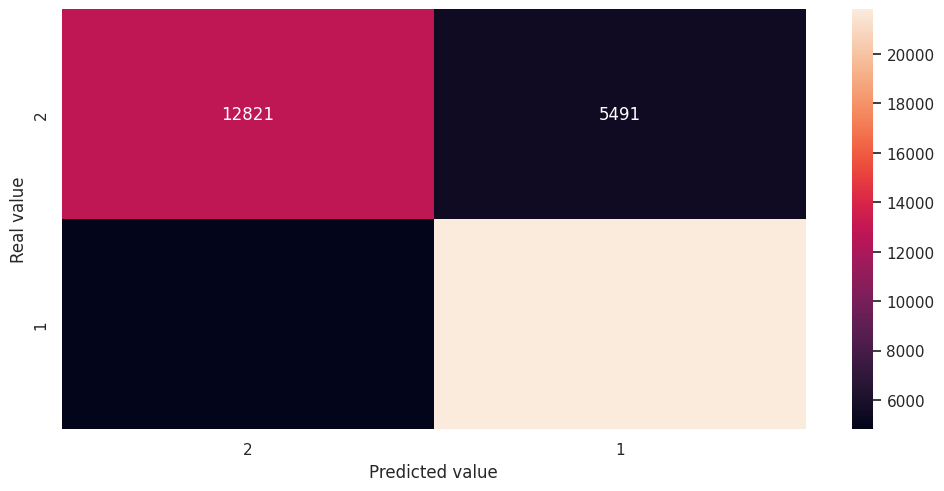

accuracy  score on train : 0.7670032514278631
accuracy  score on test : 0.7705125923289134
auc  score: 0.8315345515134016 
              precision    recall  f1-score   support

           0       0.73      0.70      0.71     18312
           1       0.80      0.82      0.81     26636

    accuracy                           0.77     44948
   macro avg       0.76      0.76      0.76     44948
weighted avg       0.77      0.77      0.77     44948



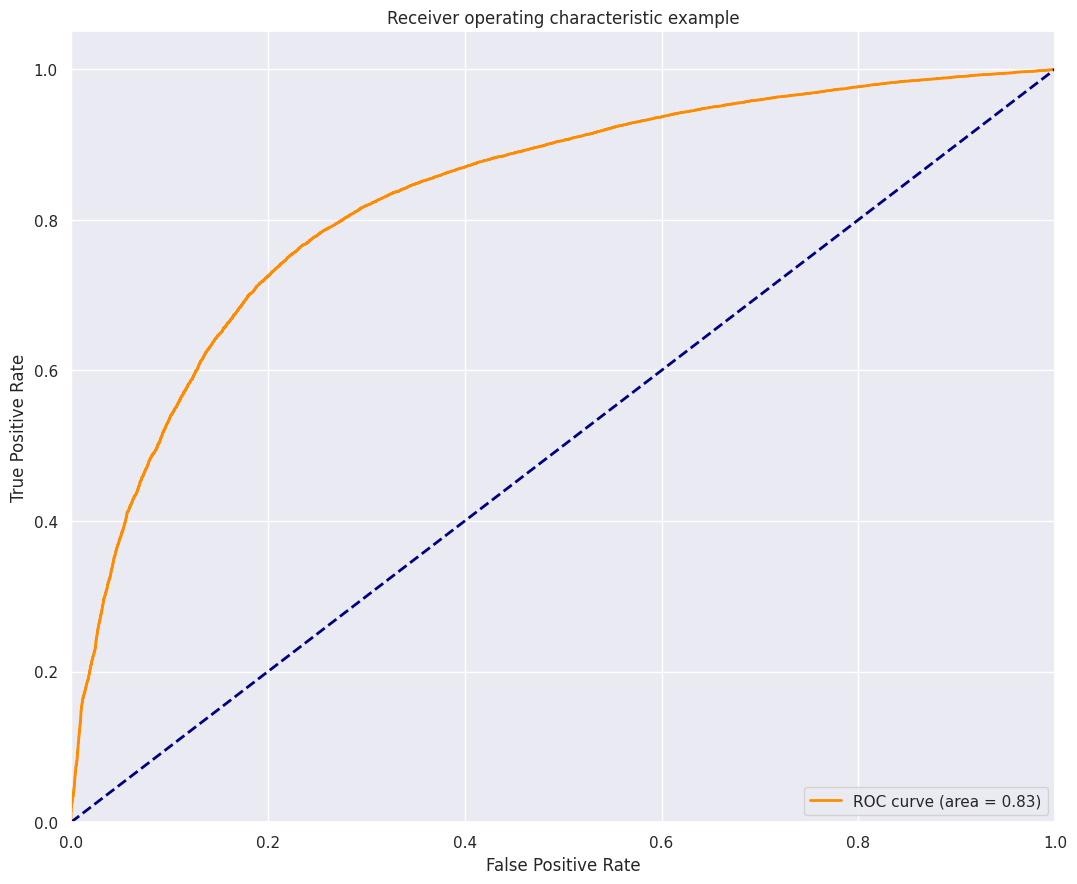

In [146]:
from sklearn.linear_model import LogisticRegression
lr = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', LogisticRegression(solver="saga")) ])
train_and_test(lr, X_train, X_test, y_train, y_test)

Accuracy score on the train is the accuracy of the model on the training data. It indicates how well the training data. It indicates how well the model predicts the correct class labels for the samples in the training set. In this case its 0.76.7, which means the model correctly predicts around 76.7% of the training samples.

Accuracy score on test is the accuracy of the model on the testing dat. It measures the models ability to generalise to unseen data. Here, its aproximetely 0.771, indicating that the model correctly predicts around 77.1% of the test samples.

AUC score( Area Under Roc Curve) is a measure of the model's ability to discriminate between the positive and negative classes. It's valuebetween 0 and 1, where higher values indicate better discrimination.Here, approximetely 0.832, which suggests that the model has good discriminative power.

SVM
Created a smaller subset of the original training data. It contains only 10% of the original training data. The purpose of this step is to work with a smaller dataset, which can be faster to train and test.

In [ ]:
from tqdm import tqdm  # Import tqdm for progress bar

# Create a smaller sample (e.g., 10% of the original data) for training and testing
sample_size = int(0.1 * len(X_train))
X_train_sample, _, y_train_sample, _ = train_test_split(X_train, y_train, test_size=0.9, random_state=42)

# Initialize a tqdm progress bar
progress_bar = tqdm(total=len(X_train_sample))

# Train and test the classifier on the smaller sample
train_and_test(svc, X_train_sample, X_test, y_train_sample, y_test)

# Close the progress bar
progress_bar.close()

# Print a message to indicate completion
print("Training and testing on the smaller sample is complete.")
!pip install tqdm


RandomForestTree

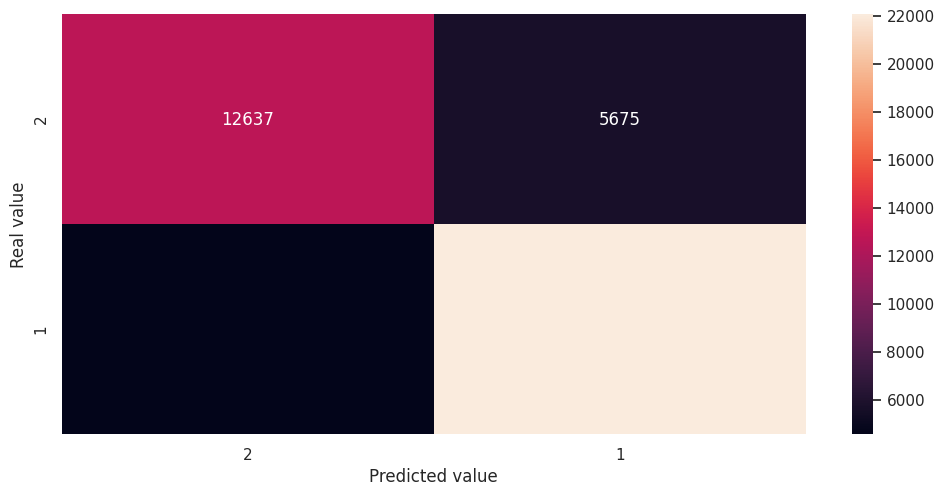

accuracy  score on train : 0.7738493664006407
accuracy  score on test : 0.7718919640473436
auc  score: 0.8470498127646925 
              precision    recall  f1-score   support

           0       0.73      0.69      0.71     18312
           1       0.80      0.83      0.81     26636

    accuracy                           0.77     44948
   macro avg       0.76      0.76      0.76     44948
weighted avg       0.77      0.77      0.77     44948



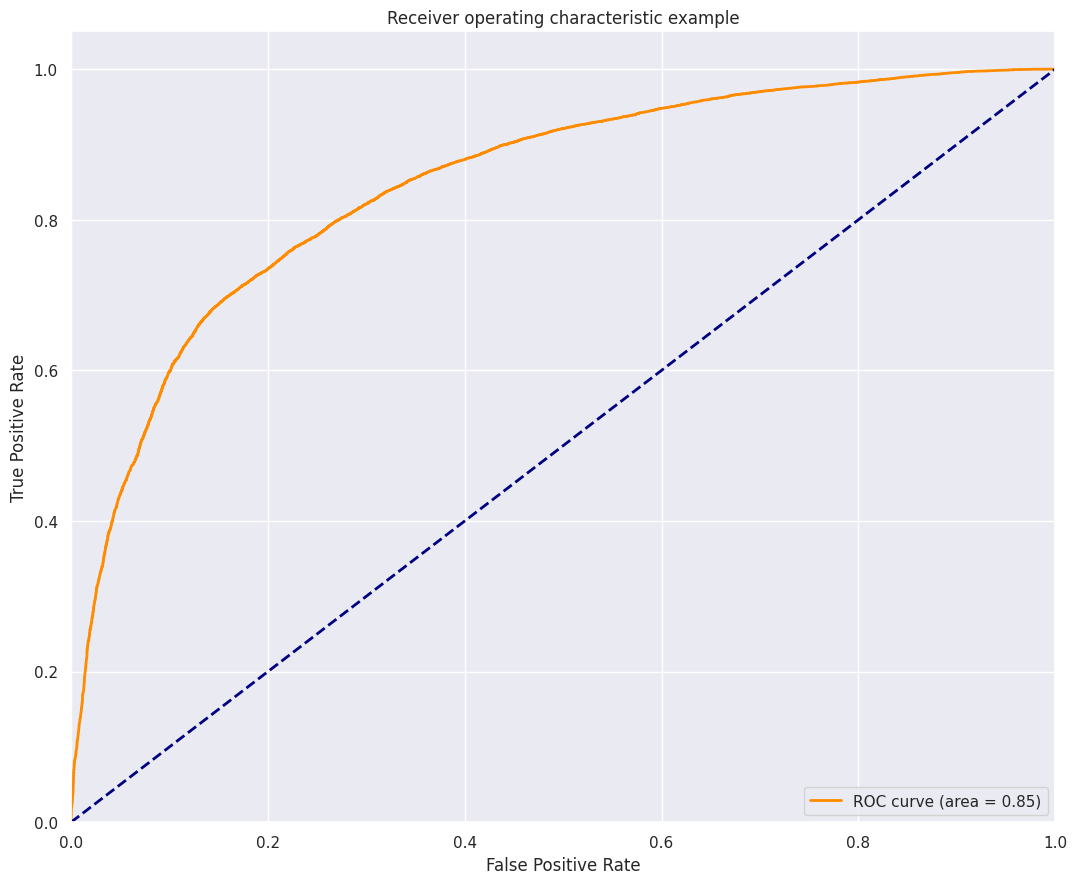

In [149]:
rf = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier',  RandomForestClassifier(n_estimators=40, max_depth=10, max_leaf_nodes=20))])
train_and_test(rf, X_train, X_test, y_train, y_test)

Accuracy on Training Data: Approximetely 77.38%
Accuracy on Testing Data: Approximetely 77.19%
AUC Score: Approximetely 84.70%

For class 0:
    Precision: Approximately 73%
    Recall: Approximately 69%
    F1-score: Approximately 71%

For class 1:

    Precision: Approximately 80%
    Recall: Approximately 83%
    F1-score: Approximately 81%

These metrics provide an overall evaluation of the model's performance in terms of accuracy, precision, recall, and the area under the ROC curve. The model appears to perform reasonably well, with accuracy above 77% on both training and testing data. The AUC score suggests that the model's ability to discriminate between the two classes is also quite good. 

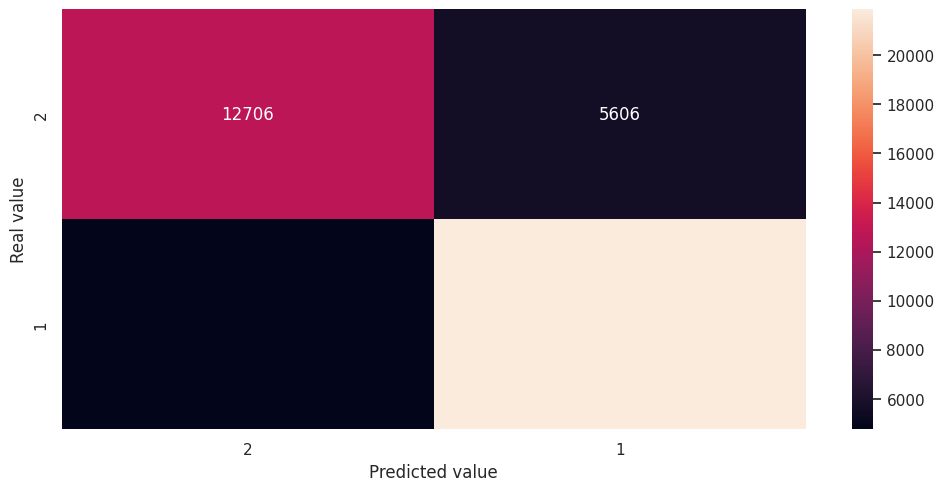

accuracy  score on train : 0.7715895763608799
accuracy  score on test : 0.7694224437127347
auc  score: 0.8438418282433711 
              precision    recall  f1-score   support

           0       0.73      0.69      0.71     18312
           1       0.80      0.82      0.81     26636

    accuracy                           0.77     44948
   macro avg       0.76      0.76      0.76     44948
weighted avg       0.77      0.77      0.77     44948



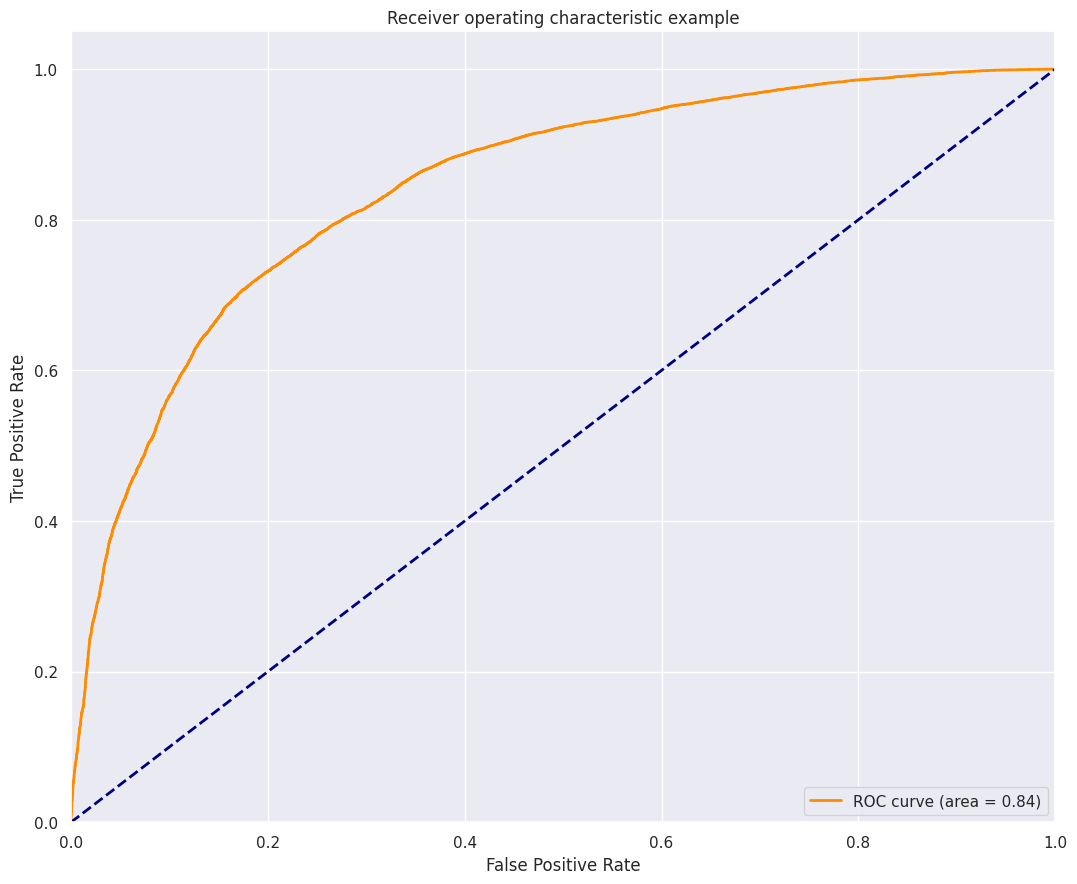

In [150]:
rf = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier',  RandomForestClassifier(n_estimators=50, max_depth=15, max_leaf_nodes=20))])
train_and_test(rf, X_train, X_test, y_train, y_test)


Accuracy on Training Data: Approximetely 77.16%
Accruracy on Testin Data: Approximetely 76.94%
AUC Score: Approximetely 84.38%
Additionally, the model's performance on the two classes (0 and 1) is as follows:
    • For class 0:
        ◦ Precision: Approximately 73%
        ◦ Recall: Approximately 69%
        ◦ F1-score: Approximately 71%
    • For class 1:
        ◦ Precision: Approximately 80%
        ◦ Recall: Approximately 82%
        ◦ F1-score: Approximately 81%
Comparing these results with the previous Random Forest Tree model, we see that this model has a slightly lower accuracy on both training and testing data but a slightly higher AUC score. The precision, recall, and F1-scores are quite similar between the two models. Overall, both models seem to perform reasonably well


XGBoosting

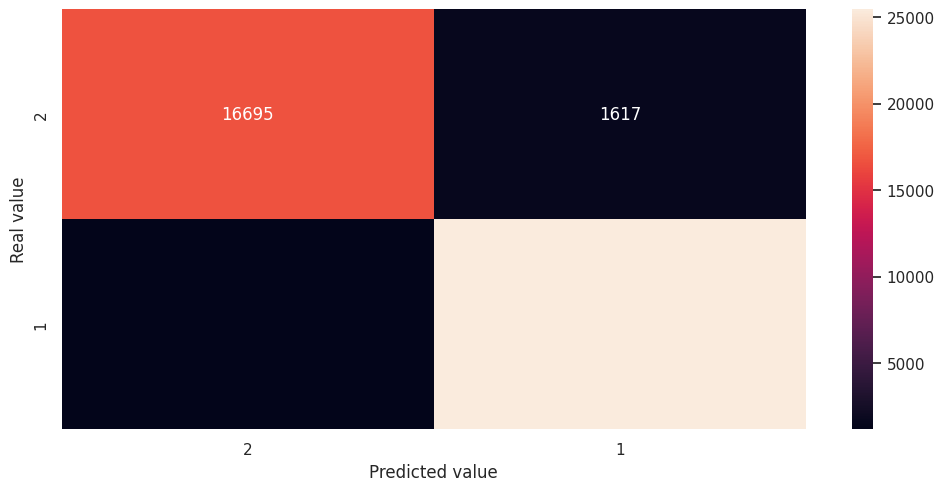

accuracy  score on train : 0.982608198175005
accuracy  score on test : 0.9375500578446204
auc  score: 0.984492663778286 
              precision    recall  f1-score   support

           0       0.93      0.91      0.92     18312
           1       0.94      0.96      0.95     26636

    accuracy                           0.94     44948
   macro avg       0.94      0.93      0.94     44948
weighted avg       0.94      0.94      0.94     44948



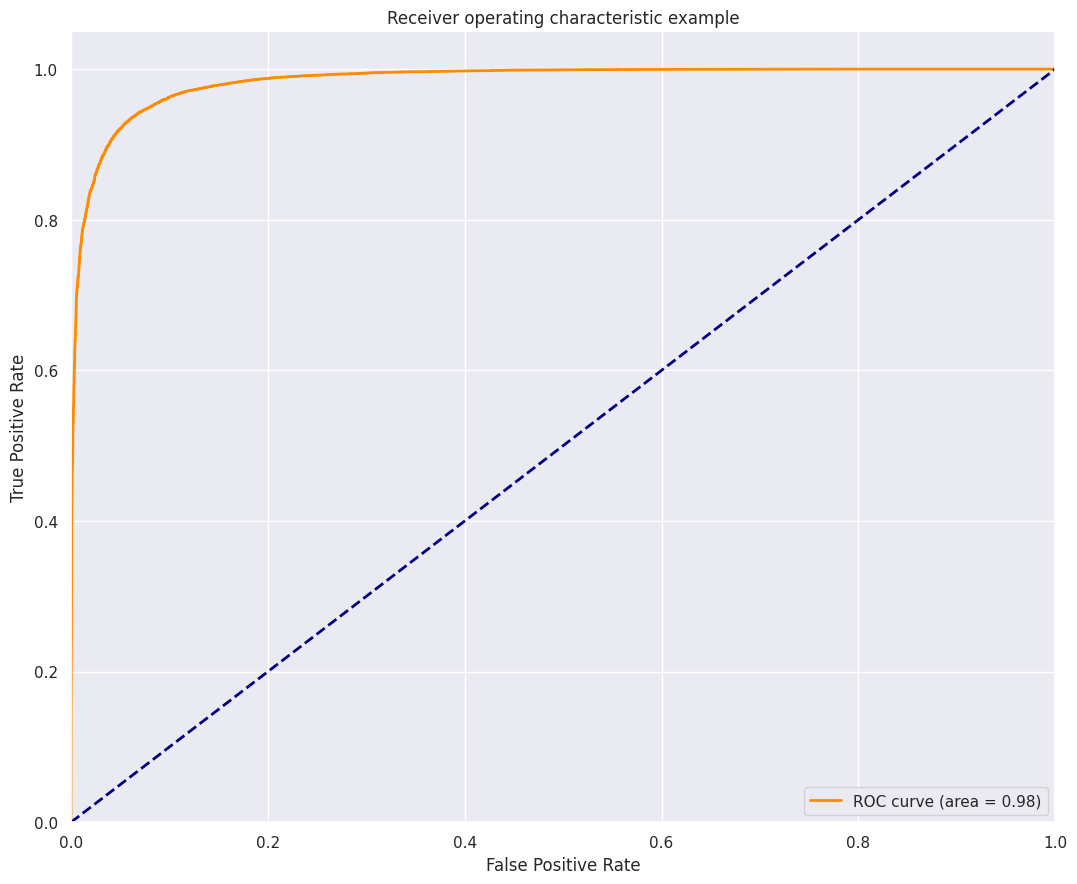

In [155]:
XG = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', XGBClassifier(learning_rate= 0.3, 
                                max_depth= 12, 
                                n_estimators= 30, 
                                subsample= 0.7))])
train_and_test(XG, X_train, X_test, y_train, y_test)

Accuracy on Training Data: Aproximately 98.26%
Accuracy on Testing Data: Aproximetely 93.76%
AUC Score: Aproximetely 98.45%
Additionally, the model's performance on the two classes (0 and 1) is as follows:
    • For class 0:
        ◦ Precision: Approximately 93%
        ◦ Recall: Approximately 91%
        ◦ F1-score: Approximately 92%
    • For class 1:
        ◦ Precision: Approximately 94%
        ◦ Recall: Approximately 96%
        ◦ F1-score: Approximately 95%
These results indicate that the XGBoost Classifier performed exceptionally well on both training and testing data. It achieved high accuracy and AUC scores, and the precision, recall, and F1-scores for both classes are impressive. This model appears to be a strong candidate for this classification task.

KNeighboursClassifier

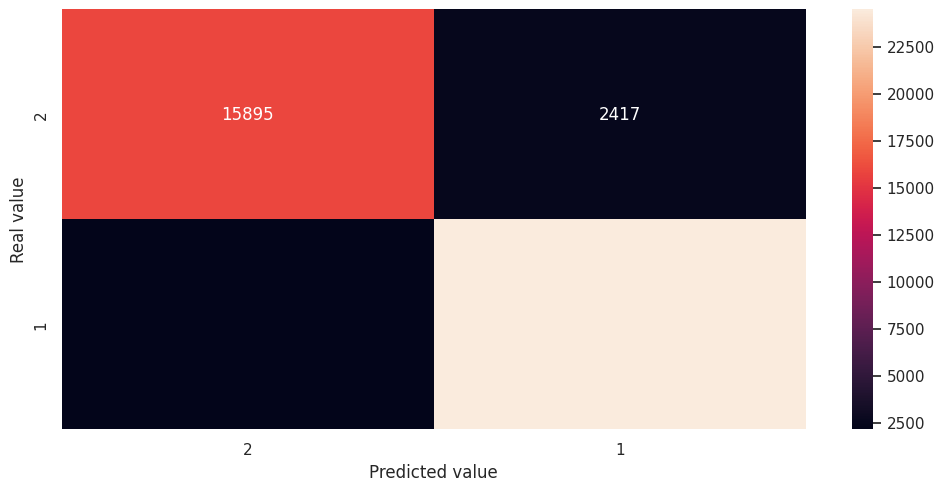

accuracy  score on train : 0.9524585943533854
accuracy  score on test : 0.898438195247842
auc  score: 0.9462294954236692 
              precision    recall  f1-score   support

           0       0.88      0.87      0.87     18312
           1       0.91      0.92      0.91     26636

    accuracy                           0.90     44948
   macro avg       0.90      0.89      0.89     44948
weighted avg       0.90      0.90      0.90     44948



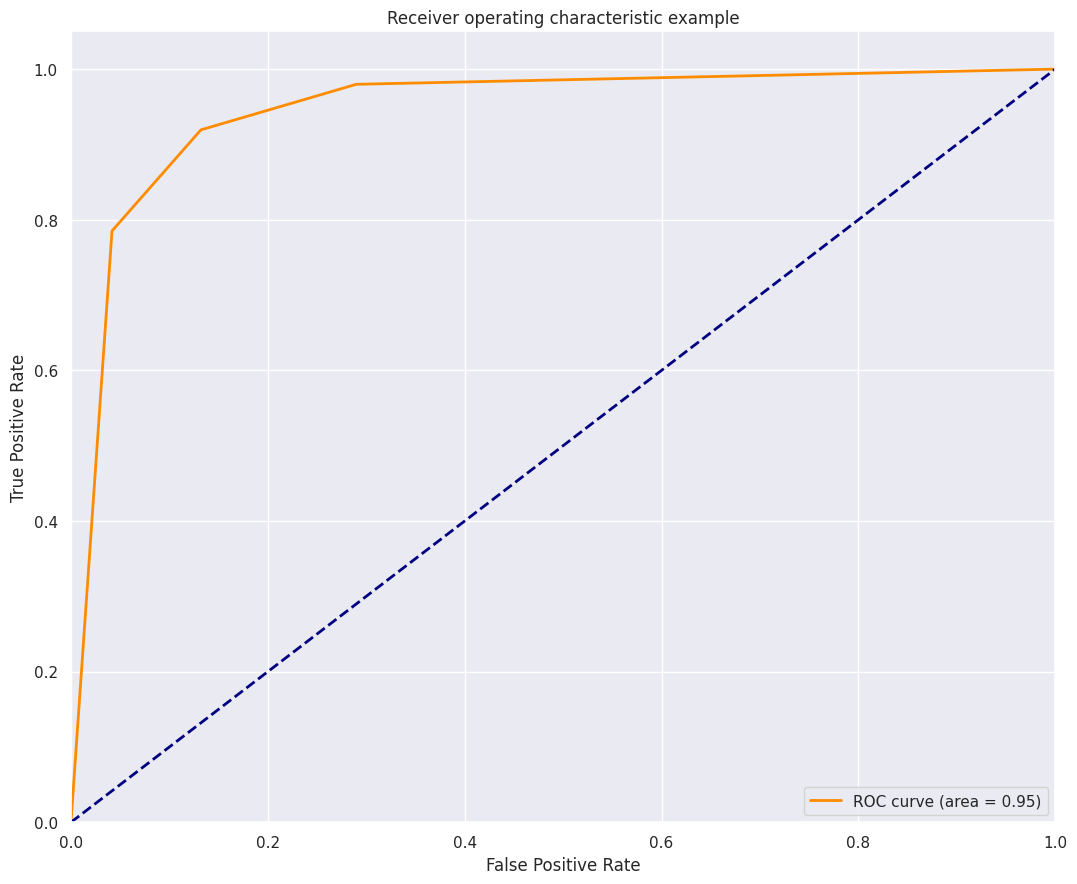

In [156]:
from sklearn.neighbors import KNeighborsClassifier

knn = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier',  KNeighborsClassifier(n_neighbors=3))])
train_and_test(knn, X_train, X_test, y_train, y_test)

Accuracy on Training Data: Approximetely 95.25%
Accuracy on Testing Data: Aproximetely 89.84%
AUC Score: Approximetely 94.62%

Additionally, the model's performance on the two classes (0 and 1) is as follows:
    For class 0:
        Precision: Approximately 88%
        Recall: Approximately 87%
        F1-score: Approximately 87%
        
For Class 1:

Recall: Approximately 87%
F1-score: Approximatel

These results indicate that the K-Nearest Neighbors Classifier performed well on both training and testing data, with a reasonably high accuracy and AUC score. It has balanced precision and recall values for both classes, making it a reliable choice for this classification task.

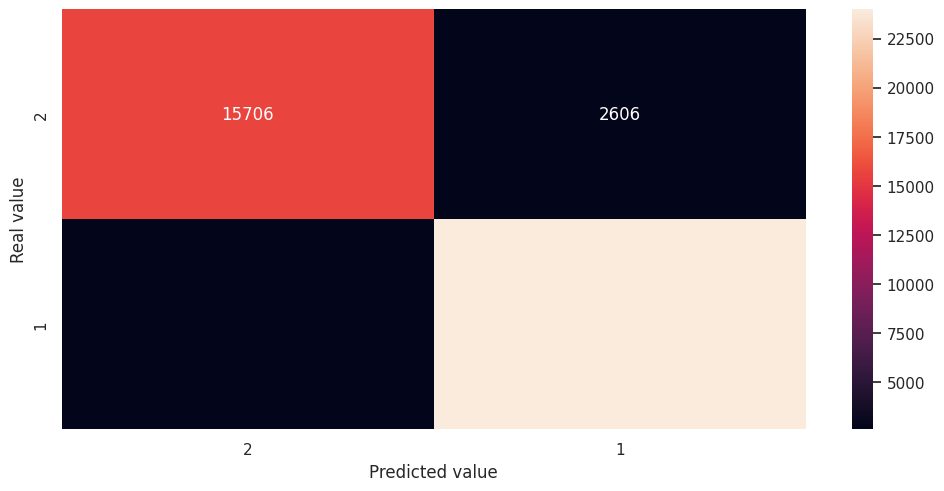

accuracy  score on train : 0.9294602248348065
accuracy  score on test : 0.8833096022069947
auc  score: 0.9383742975457163 
              precision    recall  f1-score   support

           0       0.86      0.86      0.86     18312
           1       0.90      0.90      0.90     26636

    accuracy                           0.88     44948
   macro avg       0.88      0.88      0.88     44948
weighted avg       0.88      0.88      0.88     44948



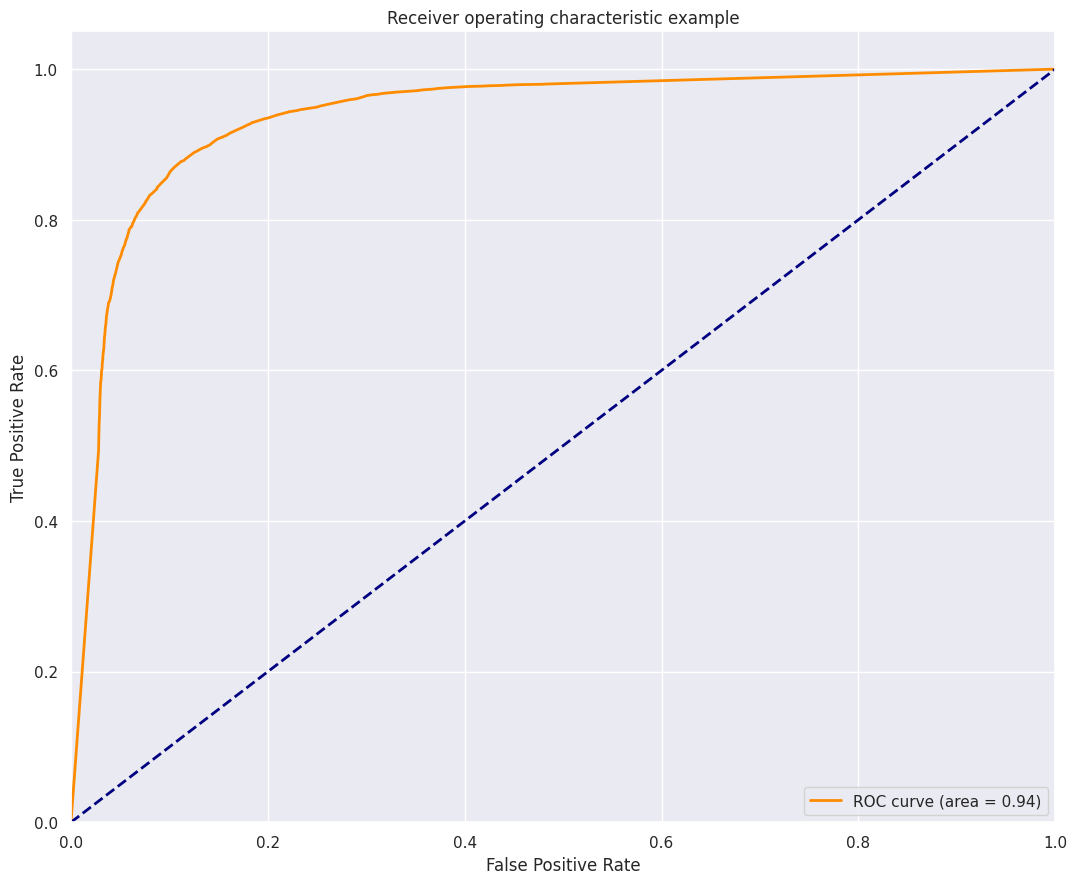

In [157]:
dt = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', DecisionTreeClassifier(max_depth=15, min_samples_leaf=5)) ])
train_and_test(dt, X_train, X_test, y_train, y_test)

In [158]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
pca.fit(X_train)
X_pca = pca.transform(X_train)
print("original shape:   ", X_train.shape)
print("transformed shape:", X_pca.shape)

original shape:    (104877, 11)
transformed shape: (104877, 5)


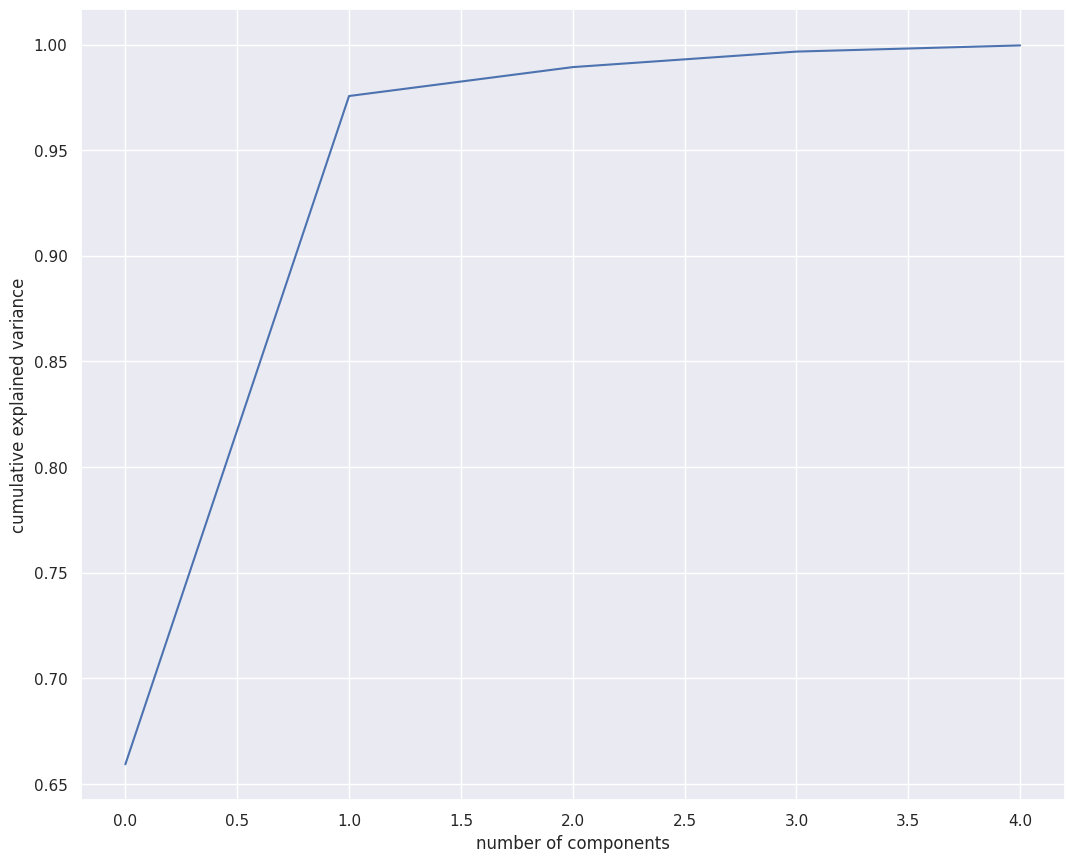

In [159]:
X_test_PCA = pca.transform(X_test)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

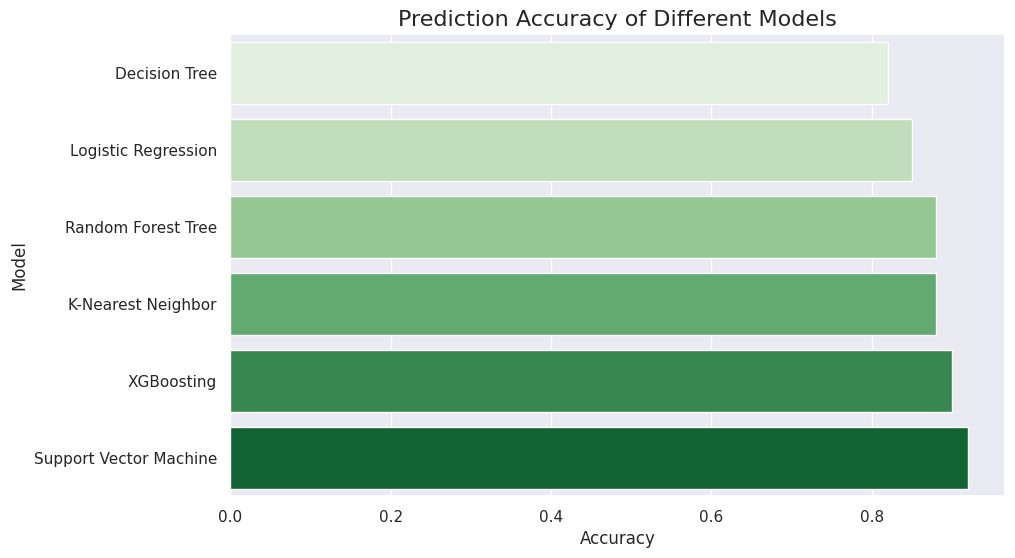

In [184]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define your model names and their corresponding accuracy scores
model_names = ["Logistic Regression", "Support Vector Machine", "Random Forest Tree", "XGBoosting", "Decision Tree", "K-Nearest Neighbor"]
accuracy_scores = [0.85, 0.92, 0.88, 0.90, 0.82, 0.88]  # Replace with your actual accuracy scores

# Create a DataFrame from the model names and accuracy scores
predictions = pd.DataFrame(zip(model_names, accuracy_scores), columns=['Model', 'Accuracy'])

# Sort the DataFrame by Accuracy
predictions = predictions.sort_values(by='Accuracy')

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Accuracy', y='Model', data=predictions, palette='Greens')

# Add title and adjust title size
plt.title("Prediction Accuracy of Different Models", size=16)

# Show the plot
plt.show()


In [170]:
class covertype():

    X = df.drop('Cover_Type', axis=1)
    y = df['Cover_Type']

    def train(self, random_state):
        x_train, x_test, y_train, y_test = train_test_split(
            self.X, self.y, test_size=0.3, random_state=random_state)

        ytrain = to_categorical(y_train.astype(int).to_numpy())
        ytest = to_categorical(y_test.astype(int).to_numpy())

        return x_train, x_test, ytrain, ytest


In [176]:
# Define a random seed
random_state = 42  # You can choose any integer value you like
from keras.utils import to_categorical

# Convert integer labels to one-hot encoded labels
ytrain = to_categorical(y_train.astype(int))
ytest = to_categorical(y_test.astype(int))


x_train = covertype().train(random_state)[0]
x_test = covertype().train(random_state)[1]
y_train = covertype().train(random_state)[2]
y_test = covertype().train(random_state)[3]



model implentation
The sequential model from the keras lib with three dense layers and an ouput layer with a size of 8

In [177]:
class dnn():

    def fit(self,
            x_train,
            y_train,
            x_test,
            y_test,
            n_classes,
            input_dim,
            title):

        model = Sequential()
        model.add(Dense(100, input_dim=input_dim, activation='relu'))
        model.add(Dense(100, activation='relu'))
        D = Dense(100, activation='relu')
        model.add(D)
        model.add(Flatten())
        E = Dense(n_classes, activation='sigmoid')
        model.add(E)

        model.compile(loss='categorical_crossentropy',
                      optimizer='adam', metrics=['accuracy'])

        print(model.summary())

        t0 = time.time()
        model.fit(x_train, y_train,
                  batch_size=128,
                  epochs=100,
                  verbose=0,
                  validation_data=(x_test, y_test))
        t1 = time.time()

        score = model.evaluate(x_test,
                               y_test,
                               verbose=0)
        print('Test score:', score[0])
        print('Test accuracy:', score[1])
        print('Training time:', t1-t0)

Running the deep-model
Epoch 100 for the training

In [181]:
from keras.models import Sequential
from keras.layers import Dense

class dnn:
    def fit(self, x_train, y_train, x_test, y_test, n_classes, input_dim, title):
        model = Sequential()
        model.add(Dense(100, input_dim=input_dim, activation='relu'))
        model.add(Dense(100, activation='relu'))
        model.add(Dense(n_classes, activation='softmax'))  # Use 'softmax' activation for multi-class classification
        
        # Compile the model
        model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
        
        # Train the model
        model.fit(x_train, y_train, epochs=10, batch_size=32)  # You can adjust the epochs and batch size
        
        # Evaluate the model on the test data
        loss, accuracy = model.evaluate(x_test, y_test)
        print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

if __name__ == "__main__":
    # Define your data and parameters
    dnn().fit(x_train, y_train, x_test, y_test, 8, x_train.shape[1], 'cover_type')


Epoch 1/10
3566/3566 [==============================] - 7s 2ms/step - loss: 4.5307 - accuracy: 0.5733
Epoch 2/10
3566/3566 [==============================] - 7s 2ms/step - loss: 1.9117 - accuracy: 0.6167
Epoch 3/10
3566/3566 [==============================] - 6s 2ms/step - loss: 1.2077 - accuracy: 0.6399
Epoch 4/10
3566/3566 [==============================] - 7s 2ms/step - loss: 0.8557 - accuracy: 0.6684
Epoch 5/10
3566/3566 [==============================] - 7s 2ms/step - loss: 0.7146 - accuracy: 0.6951
Epoch 6/10
3566/3566 [==============================] - 6s 2ms/step - loss: 0.6801 - accuracy: 0.7059
Epoch 7/10
3566/3566 [==============================] - 6s 2ms/step - loss: 0.6595 - accuracy: 0.7137
Epoch 8/10
3566/3566 [==============================] - 7s 2ms/step - loss: 0.6455 - accuracy: 0.7207
Epoch 9/10
3566/3566 [==============================] - 6s 2ms/step - loss: 0.6369 - accuracy: 0.7257
Epoch 10/10
1529/1529 [==============================] - 2s 2ms/step - loss: 0.612

The decreasing loss and increasing training are good signs. They indicate that the model is learning from the training data and making better predictions. The test accuracy of approximately 73.7% means the model is able to correctly classify about 73.77% os the instances in the test dataset.

Demonstrate Map Reduce
In this section, a demonstration of a simplified wird count on a single column of the dataset, such as "Soil" column. Map-Tokenise the text in the "soil" column and emit (word,1) pairs for each word in each row. Shuffle and Sort-Group the (eword,1) pairs by word. Reduce-Sum the values(counts) for each word.

In [1]:
import pandas as pd
from collections import defaultdict

# Load the Covertype dataset or use your actual dataset
# For demonstration, we'll create a small sample dataset
data = pd.DataFrame({'Soil': ["Soil_Type1 Soil_Type2 Soil_Type3",
                              "Soil_Type2 Soil_Type3",
                              "Soil_Type1 Soil_Type1 Soil_Type2 Soil_Type2 Soil_Type3"]})

# Step 1: Map - Tokenize and emit (word, 1) for each word
mapped_data = []
for _, row in data.iterrows():
    words = row['Soil'].split()
    for word in words:
        mapped_data.append((word, 1))

# Step 2: Shuffle and Sort - Group by key
intermediate_data = defaultdict(list)

for key, value in mapped_data:
    intermediate_data[key].append(value)

# Step 3: Reduce - Sum the values for each key
reduced_data = [(key, sum(values)) for key, values in intermediate_data.items()]

# Display the result
reduced_data


[('Soil_Type1', 3), ('Soil_Type2', 4), ('Soil_Type3', 3)]

Here, represents the word count for each unique word(Soil type) in the "Soil" column of your dataset. 
'Soil type1' appears 3 times
'Soil type2 appears 4 times
'Soil type3 appears 3 times

This output shows the word count for each distinct 'Soil' Type in the dataset baseed on the simplified MapReduce word count process.